# Data Analytics Project №3
## Исследование уровня удовлетворенности абонентов компании «МЕГАФОН» качеством предоставляемых услуг
<br>

[Постановка задачи](#Постановка-задачи) <br>
[Codebook](#Codebook)<br>

## Постановка задачи

Как и любой бизнес, компания «Мегафон» хочет повысить удовлетворённость своих клиентов качеством услуг. Это важная задача для удержания пользователей — как давних, так и недавно привлечённых. Ведь затраты на маркетинг и продвижение не оправдаются, если клиент уйдёт из-за низкого качества связи. Однако в реальном мире ресурсы всегда ограничены, и в единицу времени технический отдел может решить конечное количество задач. <br>
Чтобы делать это наиболее эффективно, важно определить, какие технические показатели качества связи сильнее всего влияют на удовлетворённость клиентов, и в первую очередь направить ресурсы на работу с ними. Для этого «Мегафон» провёл опрос своих клиентов, предложив им оценить уровень удовлетворённости качеством связи. По каждому клиенту, прошедшему опрос, были собраны технические показатели. <br>
Подготовьте исследование для компании «Мегафон» и проанализируйте, как зависит (и зависит ли) оценка, которую ставит клиент в опросе, от технических показателей, которые были собраны. <br><br><br>

**Более подробно о проведённом опросе:**

В ходе опроса компания «Мегафон» предложила своим клиентам оценить уровень удовлетворённости качеством связи по десятибалльной шкале (где 10 — это «отлично», а 1 — «ужасно»). Если клиент оценивал качество связи на 9 или 10 баллов, опрос заканчивался. Если клиент ставил оценку ниже 9, задавался второй вопрос — о причинах неудовлетворённости качеством связи с предоставленными пронумерованными вариантами ответа. Ответ можно было дать в свободном формате или перечислить номера ответов через запятую. Ниже вы можете ознакомиться с инфографикой по структуре опроса.<br>

![](https://sun9-32.userapi.com/C6vN5pHQW7hlseIt0AtTN7qNDQbDnHXdt1P2NA/ILntXqa-RrA.jpg)

## Codebook

`megafon.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `user_id` — идентификатор абонента;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Q1` — ответ на первый вопрос;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Q2` — ответ на второй вопрос;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Total Traffic(MB)` — объем трафика передачи данных <sup>1 </sup>; <br>
&nbsp;&nbsp;&nbsp;&nbsp; `Downlink Throughput(Kbps)` — средняя скорость «к абоненту» <sup>2 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Uplink Throughput(Kbps)`— средняя скорость «от абонента» <sup>3 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Downlink TCP Retransmission Rate(%)` — частота переотправок пакетов «к абоненту» <sup>4 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming Download Throughput(Kbps)` — скорость загрузки потокового видео <sup>5 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming xKB Start Delay(ms)` — задержка старта воспроизведения видео <sup>6 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Page Download Throughput(Kbps)` — скорость загрузки web-страниц через браузер <sup>7 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Average TCP RTT(ms)` — пинг при просмотре web-страниц<sup>8 </sup>.<br>


<sup>1 </sup> — Насколько активно абонент использует мобильный интернет.<br>
<sup>2 </sup> — Считается по всему трафику передачи данных.<br>
<sup>3 </sup> — Считается по всему трафику передачи данных.<br>
<sup>4 </sup> — Чем выше, тем хуже. Если в канале возникает ошибка, пакет переотправляется. Снижается полезная скорость.<br>
<sup>5 </sup> — Чем выше, тем лучше — меньше прерываний и лучше качество картинки.<br>
<sup>6 </sup> — Сколько времени пройдёт между нажатием на кнопку Play и началом воспроизведения видео. Чем меньше это время, тем быстрее начинается воспроизведение.<br>
<sup>7 </sup> — Чем выше, тем лучше.<br>
<sup>8 </sup> — Чем меньше, тем лучше — быстрее загружаются web-страницы.<br>

Первый технический показатель представлен как сумма за период в одну неделю перед участием в опросе. Остальные технические показатели отображают среднее значение по данному признаку за период в одну неделю перед участием в опросе.

In [1]:
# Импорт необходимых библиотек
import math
import re
from textwrap import wrap

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from IPython.display import Markdown, display
from matplotlib.colors import rgb2hex
from scipy.stats import mannwhitneyu, ttest_ind

plt.style.use("seaborn")
sns.set(font_scale=1.2, palette="magma")
plt.rcParams["font.size"] = "14"

# 1. Загрузка и описание сырых данных

In [2]:
# Выгрузка данных из файла
df = pd.read_csv("data/megafon.csv", index_col=0)
df.head()

Q1       Q2  Total Traffic(MB)  Downlink Throughput(Kbps)  \
user_id                                                             
1        5      NaN          775.48846                     360.13   
2        5        4          861.96324                    3023.54   
3        1        4          261.11860                     790.96   
4        8        3          179.18564                    2590.97   
5        2  2, 3, 4          351.99208                     731.61   

         Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)  \
user_id                                                                 
1                          86.56                                 3.93   
2                         411.18                                 1.27   
3                          34.20                                 1.79   
4                         325.88                                 0.80   
5                         223.54                                 1.15   

         Video Streaming Download Throughput(Kbps)  \
user_id                                              
1                                          1859.15   
2                                           667.47   
3                                          1079.60   
4                                          7053.81   
5                                          4550.38   

         Video Streaming xKB Start Delay(ms)  \
user_id                                        
1                                       2309   
2                                       2080   
3                                       6367   
4                                       3218   
5                                       1767   

         Web Page Download Throughput(Kbps)  Web Average TCP RTT(ms)  
user_id                                                               
1                                   1007.82                       83  
2                                    255.36                      425  
3                                    535.85                      485  
4                                   1221.02                       51  
5                                   2336.56                       68

In [3]:
# Общее описание датафрейма
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112 entries, 1 to 3112
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Q1                                         3110 non-null   object 
 1   Q2                                         1315 non-null   object 
 2   Total Traffic(MB)                          3112 non-null   float64
 3   Downlink Throughput(Kbps)                  3112 non-null   float64
 4   Uplink Throughput(Kbps)                    3112 non-null   float64
 5   Downlink TCP Retransmission Rate(%)        3112 non-null   float64
 6   Video Streaming Download Throughput(Kbps)  3112 non-null   float64
 7   Video Streaming xKB Start Delay(ms)        3112 non-null   int64  
 8   Web Page Download Throughput(Kbps)         3112 non-null   float64
 9   Web Average TCP RTT(ms)                    3112 non-null   int64  
dtypes: float64(6), int64(2),

In [4]:
# Количество нулевых значений
df.isnull().sum()

Q1                                              2
Q2                                           1797
Total Traffic(MB)                               0
Downlink Throughput(Kbps)                       0
Uplink Throughput(Kbps)                         0
Downlink TCP Retransmission Rate(%)             0
Video Streaming Download Throughput(Kbps)       0
Video Streaming xKB Start Delay(ms)             0
Web Page Download Throughput(Kbps)              0
Web Average TCP RTT(ms)                         0
dtype: int64

В наших данных присутствуют 2 пропуска среди ответов на первый вопрос `Q1`. Мы не можем их никак интерпретировать, поэтому удалим эти строки из датафрейма.

Среди ответов на второй вопрос `Q2` много пропусков. Скорее всего, большинство из них обусловлено ответом 9 или 10 на первый вопрос `Q1`, так как после этого опрос завершается. Нам необходимо отделить пропущенные значения при положительных оценках от всех остальных и посмотреть на последние подробнее.

# 2. Предварительная обработка данных

## 2.1 Интерпретация Q1

In [5]:
# Удаляем пропуски в ответах на первый вопрос
df = df[df["Q1"].notna()]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3110 entries, 1 to 3112
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Q1                                         3110 non-null   object 
 1   Q2                                         1315 non-null   object 
 2   Total Traffic(MB)                          3110 non-null   float64
 3   Downlink Throughput(Kbps)                  3110 non-null   float64
 4   Uplink Throughput(Kbps)                    3110 non-null   float64
 5   Downlink TCP Retransmission Rate(%)        3110 non-null   float64
 6   Video Streaming Download Throughput(Kbps)  3110 non-null   float64
 7   Video Streaming xKB Start Delay(ms)        3110 non-null   int64  
 8   Web Page Download Throughput(Kbps)         3110 non-null   float64
 9   Web Average TCP RTT(ms)                    3110 non-null   int64  
dtypes: float64(6), int64(2),

In [7]:
# Посмотрим, сколько уникальных ответов на 2 этапах опроса
df.describe(include=object)

Q1    Q2
count   3110  1315
unique    49    51
top       10     3
freq     846   190

Полученные результаты явно не соответствуют желаемым. На первый вопрос `Q1` по условиям опроса существует всего 10 уникальных ответов — одно число от 1 до 10. Посмотрим на все уникальные ответы, которые присутствуют в наших данных. 

In [8]:
# Посмотрим на уникальные ответы Q1
df.loc[:, "Q1"].unique()

array(['5', '1', '8', '2', '3', '9', '10', '7', '4', '11', '6', '2, 9',
       '0', '1, 3', '19', '15', '1, 6', '***** ** ***',
       '3 - дер.Ширяево Волоколамского района, 9 - в Москве', '10, 9',
       'Чем даль ше,тем лучше.Спасибо за ваш труд.Оценка 10 !',
       'ОЦЕНКА-3/НЕВАЖНО/', 'Отвратительно',
       'Я ценой услуг не удовлетворен', 'Пока не понял', '3, 9', '5, 6',
       '0, 1, 5', '5, 7', 'Hi',
       '4. Тульская область Заокский район. Романовские дачи связи почти нет',
       'Немагу дать атценку денги незашто снимаеть скоро выклучаю',
       '10, 50',
       'Очень  хорошо. Обслуживания  я довольно. Спасибо вам.555', '?',
       'Поохое',
       'Когда в Москве-10 а когда в калужской области в деревне Бели-1',
       'Нет', 'Да', 'Ужасно',
       '3 тройка, связь отвратительная, жалко платить за такой тарив',
       'Чдтчдтччдтччч', '3, 7', '20, 89031081392', '1, 8', 'Без з',
       '10, 5', '2, 5',
       'Я в Смол. Области живу сейчас, не пользуюсь телефоном совсем

Многие ответы невозможно интерпретировать. Например, ответы **'3, 9'**, **'0, 1, 5'** или **'Нет'**, **'Да'**, **'Немагу дать атценку денги незашто снимаеть скоро выклучаю'**, **'Hi'** и подобные. Мы не можем однозначно ответить, какую оценку на самом деле хотел оставить клиент и как он оценивает услуги компании.

Есть более точные, например: **'ОЦЕНКА-3/НЕВАЖНО/'**,  **'Чем даль ше,тем лучше.Спасибо за ваш труд.Оценка 10 !'**. 
Такие ответы уже легко интерпретируются, но требуют дополнительной обработки. 

Кроме того, присутствуют ответы, которые могут быть хорошо интерпретируемы, но для интерпретации которых у нас недостаточно данных: **'3 - дер.Ширяево Волоколамского района, 9 - в Москве'**. Мы не знаем, где именно находился клиент в период сбора данных для анализа (в течение одной недели перед участием в опросе).

Что мы можем сделать?
1. Удалить все некорректные ответы, включая те, что легко интепретировать.  
Все очень просто, но мы можем лишиться каких-то важных данных.
2. Удалить все ответы, которые нельзя интерпретировать и оставить те, которые интерпретировать все же можно.  
Работая с конкретным небольшим набором данных, мы можем провести обработку вручную, но стоит учесть, что в дальнейшем на других данных наш способ уже работать не будет.  

Попробуем максимально сохранить наши данные и используем 2ой метод.

In [9]:
# Создадим список корректных ответов
correct_answ = [str(x) for x in range(1, 11)]

# Вычислим процент некорректных ответов до обработки
error_percent = df[~df["Q1"].isin(correct_answ)]["Q1"].count() / df["Q1"].count()

print(f"Процент некорректных ответов Q1 до обработки = {error_percent:.2%}")

Процент некорректных ответов Q1 до обработки = 1.67%


In [10]:
# Вручную выберем интерпретируемые ответы
answ_1 = ["Отвратительно", "Поохое", "Ужасно", "0"]
answ_3 = [
    "ОЦЕНКА-3/НЕВАЖНО/",
    "3 тройка, связь отвратительная, жалко платить за такой тарив",
]
answ_10 = [
    "Очень  хорошо. Обслуживания  я довольно. Спасибо вам.555",
    "Чем даль ше,тем лучше.Спасибо за ваш труд.Оценка 10 !",
    "10, 9",
]

# Заменим отобранные ответы на корректные
df.loc[df["Q1"].isin(answ_1), "Q1"] = "1"
df.loc[df["Q1"].isin(answ_3), "Q1"] = "3"
df.loc[
    df["Q1"] == "4. Тульская область Заокский район. Романовские дачи связи почти нет",
    "Q1",
] = "4"
df.loc[df["Q1"] == "5, 6", "Q1"] = "5"
df.loc[df["Q1"].isin(answ_10), "Q1"] = "10"

In [11]:
# Вычислим процент оставшихся некорректных ответов
error_percent_processed = (
    df[~df["Q1"].isin(correct_answ)]["Q1"].count() / df["Q1"].count()
)

print(f"Процент некорректных ответов Q1 = {error_percent_processed:.2%}")

Процент некорректных ответов Q1 = 1.00%


У нас получилось немного улучшить наши данные. Так как процент некорректных неинтерпретируемых ответов очень мал, мы можем их удалить.

In [12]:
df = df[df["Q1"].isin(correct_answ)]
df.loc[:, "Q1"] = df.Q1.astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3079 entries, 1 to 3112
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Q1                                         3079 non-null   int64  
 1   Q2                                         1315 non-null   object 
 2   Total Traffic(MB)                          3079 non-null   float64
 3   Downlink Throughput(Kbps)                  3079 non-null   float64
 4   Uplink Throughput(Kbps)                    3079 non-null   float64
 5   Downlink TCP Retransmission Rate(%)        3079 non-null   float64
 6   Video Streaming Download Throughput(Kbps)  3079 non-null   float64
 7   Video Streaming xKB Start Delay(ms)        3079 non-null   int64  
 8   Web Page Download Throughput(Kbps)         3079 non-null   float64
 9   Web Average TCP RTT(ms)                    3079 non-null   int64  
dtypes: float64(6), int64(3),

## 2.2 Интерпретация Q2

Разобьем данные на 2 датафрейма: те клиенты, которые ответили на 1 вопрос `Q1` 10 или 9, и все остальные. 

In [13]:
df_good = df[df["Q1"].isin([9, 10])]
df_bad = df[~df["Q1"].isin([9, 10])]

На второй вопрос `Q2` по условиям опроса можно выбрать ответ из предложенных 1 — 7 (в том числе несколько), а также дать свой вариант ответа в свободной форме. Посмотрим на все существующие ответы `Q2` в датафрейме `df_bad`, чтобы получить общую картину.

In [14]:
df_bad

Q1          Q2  Total Traffic(MB)  Downlink Throughput(Kbps)  \
user_id                                                                 
1         5         NaN          775.48846                     360.13   
2         5           4          861.96324                    3023.54   
3         1           4          261.11860                     790.96   
4         8           3          179.18564                    2590.97   
5         2     2, 3, 4          351.99208                     731.61   
...      ..         ...                ...                        ...   
3107      1         NaN          490.50187                    1992.68   
3108      3     1, 4, 5          519.96475                    1045.70   
3109      3  1, 3, 4, 5          171.52629                     670.32   
3111      6        1, 3          827.74515                    1841.90   
3112      6         NaN          596.22757                    2196.00   

         Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)  \
user_id                                                                 
1                          86.56                                 3.93   
2                         411.18                                 1.27   
3                          34.20                                 1.79   
4                         325.88                                 0.80   
5                         223.54                                 1.15   
...                          ...                                  ...   
3107                       85.73                                 0.87   
3108                       44.61                                 0.47   
3109                       40.94                                 2.35   
3111                      373.53                                 1.21   
3112                      265.87                                 0.41   

         Video Streaming Download Throughput(Kbps)  \
user_id                                              
1                                          1859.15   
2                                           667.47   
3                                          1079.60   
4                                          7053.81   
5                                          4550.38   
...                                            ...   
3107                                       3477.94   
3108                                       4523.66   
3109                                       1711.54   
3111                                       5675.93   
3112                                       9295.59   

         Video Streaming xKB Start Delay(ms)  \
user_id                                        
1                                       2309   
2                                       2080   
3                                       6367   
4                                       3218   
5                                       1767   
...                                      ...   
3107                                    2004   
3108                                    1468   
3109                                    2780   
3111                                    1905   
3112                                    2036   

         Web Page Download Throughput(Kbps)  Web Average TCP RTT(ms)  
user_id                                                               
1                                   1007.82                       83  
2                                    255.36                      425  
3                                    535.85                      485  
4                                   1221.02                       51  
5                                   2336.56                       68  
...                                     ...                      ...  
3107                                2369.41                      245  
3108                                1044.66                      304  
3109                                 954.91                      251  


In [15]:
df_bad.Q2.unique()

array([nan, '4', '3', '2, 3, 4', '4, 5', '1, 3, 4', '1, 3, 4, 5', '1, 3',
       '3, 4', '1, 2', '3, 5', '1', '7', '1, 4', '1, 2, 3, 4, 5', '2, 3',
       '1, 2, 3, 4', '2, 3, 4, 5', '3, 4, 5', '1, 2, 5', '1, 5',
       '1, 2, 4', '6', '1, 4, 5', '1, 2, 3', '2, 5', '2, 4, 5', '1, 2, 7',
       '5', '2', '1, 2, 3, 4, 5, 6', '0, 1, 7', '4, 7', '1, 4, 7', '0, 3',
       '1, 3, 4, 5, 7', '3, 7', '1, 3, 4, 7', '3, 4, 5, 7', '2, 4',
       '5, 6', '1, 2, 3, 5', '1, 3, 5', '1, 2, 34', '1, 2, 4, 5',
       '0, 05, 2, 27, 7', '1, 3, 7', '3, 4, 7', '1, 2, 3, 4, 7', '10',
       '0', '1, 2, 3, 7'], dtype=object)

По большей части ответы на вопросы корректны, но встречаются пропущенные значения и ответы, в которых присутствуют значения '0' и двузначные числа (возможно, пропущены запятые между ответами). Письменные ответы в свободной форме отсутствуют. Обработаем столбец.

In [16]:
def Q2_parcer(x):
    """The function intended for interpreting Q2 responses returns a list containing only correct responses."""
    # Регулярным выражением делим строки с ответами на список чисел
    if type(x) == str:
        ex = re.findall(r"\d+", x)
    # Если ответа нет, то отсутствующие ответы заменяем на 0
    else:
        ex = [0]
    # Преобразуем полученные числа к типу int для дальнейшей обработки
    ex = list(map(int, ex))

    # Создаем новый список для обработанных корректных ответов
    Q2_correct = []
    # Если ответ был '0' или ответа нет, заканчиваем обработку
    if ex == [0]:
        return ex
    else:
        # Итерируемся по полученному списку чисел и проверяем числа на корректность
        for e in ex:
            if 1 <= e <= 7:
                Q2_correct.append(e)
            elif e >= 10:
                # Если двузначное число, делим по символам и проверяем каждый на корректность
                Q2_correct += [int(x) for x in str(e) if 1 <= int(x) <= 7]
        # Если клиент выбрал какие-то корректные варианты ответов, то отбрасываем пункт "6. Затрудняюсь ответить"
        if (len(Q2_correct) != 1) & (6 in ex):
            Q2_correct.remove(6)
        # Возвращаем список уникальных корректных ответов
        return list(set(Q2_correct))

In [17]:
# Создадим новый датафрейм, содержащий только корректные ответы на 2ой вопрос
df_bad_clear = df_bad.copy()
df_bad_clear["Q2"] = df_bad_clear["Q2"].apply(lambda x: Q2_parcer(x))
# Посчитаем, какое количетво причин указывали клиенты во 2ом вопросе
# (если выбран пункт "6. Затрудняюсь ответить", считаем, что количество причин = 0)
df_bad_clear["Q2 Count"] = df_bad_clear["Q2"].apply(
    lambda x: len(x) if (x != [0] and x != [6]) else 0
)
df_bad_clear.head(10)

Q1            Q2  Total Traffic(MB)  Downlink Throughput(Kbps)  \
user_id                                                                   
1         5           [0]          775.48846                     360.13   
2         5           [4]          861.96324                    3023.54   
3         1           [4]          261.11860                     790.96   
4         8           [3]          179.18564                    2590.97   
5         2     [2, 3, 4]          351.99208                     731.61   
6         3           [0]          416.67461                    1346.89   
7         2        [4, 5]          448.88413                     438.27   
9         1     [1, 3, 4]          783.64464                    1786.99   
10        3  [1, 3, 4, 5]          455.97369                     610.43   
11        3        [1, 3]          526.08652                     535.54   

         Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)  \
user_id                                                                 
1                          86.56                                 3.93   
2                         411.18                                 1.27   
3                          34.20                                 1.79   
4                         325.88                                 0.80   
5                         223.54                                 1.15   
6                         175.53                                 1.08   
7                          81.32                                 1.98   
9                         271.77                                 0.84   
10                         81.86                                 4.10   
11                        208.67                                 1.46   

         Video Streaming Download Throughput(Kbps)  \
user_id                                              
1                                          1859.15   
2                                           667.47   
3                                          1079.60   
4                                          7053.81   
5                                          4550.38   
6                                          4553.01   
7                                          1699.64   
9                                          6802.42   
10                                         1317.76   
11                                         2621.14   

         Video Streaming xKB Start Delay(ms)  \
user_id                                        
1                                       2309   
2                                       2080   
3                                       6367   
4                                       3218   
5                                       1767   
6                                       2136   
7                                       4223   
9                                       1200   
10                                      3350   
11                                      1479   

         Web Page Download Throughput(Kbps)  Web Average TCP RTT(ms)  Q2 Count  
user_id                                                                         
1                                   1007.82                       83         0  
2                                    255.36                      425         1  
3                                    535.85                      485         1  
4                                   1221.02                       51         1  
5                                   2336.56                       68         3  
6                                   1587.58                      551         0  
7                                    856.05                      220         2  
9                                   1837.02                      132         3  
10                                  1054.15                      165         4  
11                                  2376.50                       88         2

In [18]:
# Развернем данные: каждой строке будет соответствовать только один ответ Q2, все остальные данные будут дублироваться
df_bad_clear_exploded = df_bad_clear.explode("Q2")
df_bad_clear_exploded["Q2"] = df_bad_clear_exploded["Q2"].astype(int)
df_bad_clear_exploded.head()

Q1  Q2  Total Traffic(MB)  Downlink Throughput(Kbps)  \
user_id                                                         
1         5   0          775.48846                     360.13   
2         5   4          861.96324                    3023.54   
3         1   4          261.11860                     790.96   
4         8   3          179.18564                    2590.97   
5         2   2          351.99208                     731.61   

         Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)  \
user_id                                                                 
1                          86.56                                 3.93   
2                         411.18                                 1.27   
3                          34.20                                 1.79   
4                         325.88                                 0.80   
5                         223.54                                 1.15   

         Video Streaming Download Throughput(Kbps)  \
user_id                                              
1                                          1859.15   
2                                           667.47   
3                                          1079.60   
4                                          7053.81   
5                                          4550.38   

         Video Streaming xKB Start Delay(ms)  \
user_id                                        
1                                       2309   
2                                       2080   
3                                       6367   
4                                       3218   
5                                       1767   

         Web Page Download Throughput(Kbps)  Web Average TCP RTT(ms)  Q2 Count  
user_id                                                                         
1                                   1007.82                       83         0  
2                                    255.36                      425         1  
3                                    535.85                      485         1  
4                                   1221.02                       51         1  
5                                   2336.56                       68         3

In [19]:
# Соберем обработанные данные в новый чистый датафрейм
df_clear = pd.concat([df_bad_clear, df_good])
df_clear.sort_values(by="user_id", inplace=True)
df_clear.head(10)

Q1            Q2  Total Traffic(MB)  Downlink Throughput(Kbps)  \
user_id                                                                   
1         5           [0]          775.48846                     360.13   
2         5           [4]          861.96324                    3023.54   
3         1           [4]          261.11860                     790.96   
4         8           [3]          179.18564                    2590.97   
5         2     [2, 3, 4]          351.99208                     731.61   
6         3           [0]          416.67461                    1346.89   
7         2        [4, 5]          448.88413                     438.27   
8         9           NaN          550.44581                    3428.69   
9         1     [1, 3, 4]          783.64464                    1786.99   
10        3  [1, 3, 4, 5]          455.97369                     610.43   

         Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)  \
user_id                                                                 
1                          86.56                                 3.93   
2                         411.18                                 1.27   
3                          34.20                                 1.79   
4                         325.88                                 0.80   
5                         223.54                                 1.15   
6                         175.53                                 1.08   
7                          81.32                                 1.98   
8                         164.44                                 1.05   
9                         271.77                                 0.84   
10                         81.86                                 4.10   

         Video Streaming Download Throughput(Kbps)  \
user_id                                              
1                                          1859.15   
2                                           667.47   
3                                          1079.60   
4                                          7053.81   
5                                          4550.38   
6                                          4553.01   
7                                          1699.64   
8                                         16753.96   
9                                          6802.42   
10                                         1317.76   

         Video Streaming xKB Start Delay(ms)  \
user_id                                        
1                                       2309   
2                                       2080   
3                                       6367   
4                                       3218   
5                                       1767   
6                                       2136   
7                                       4223   
8                                       1061   
9                                       1200   
10                                      3350   

         Web Page Download Throughput(Kbps)  Web Average TCP RTT(ms)  Q2 Count  
user_id                                                                         
1                                   1007.82                       83       0.0  
2                                    255.36                      425       1.0  
3                                    535.85                      485       1.0  
4                                   1221.02                       51       1.0  
5                                   2336.56                       68       3.0  
6                                   1587.58                      551       0.0  
7                                    856.05                      220       2.0  
8                                   3037.36                       88       NaN  
9                                   1837.02                      132       3.0  
10                                  1054.15                      165       4.0

# 3. Анализ данных

Проанализируем датасет по ответам на вопросы Q1 и Q2: выясним, что отличает клиентов, выставивших оценку на 1ый вопрос (Q1), равную 9 или 10, а также по каким причинам (Q2) клиенты оценивали качество связи ниже, чем на 9 баллов. Это позволит понять, какие метрики качества услуг наиболее сильно влияют на высокую степень удовлетворенности клиентов. Ответы на эти вопросы помогут компании "Мегафон" выявить связи между субъективными оценками качества услуг и их объективными техническими параметрами, что в дальнейшем можно будет использовать для формирования лучшей сервисной модели.

Посмотрим на распределение данных в числовых столбцах. Используем boxplot, чтобы получить максимальное количество информации: квартили (в том числе медиана), минимальные и максимальные значения, наличие выбросов.

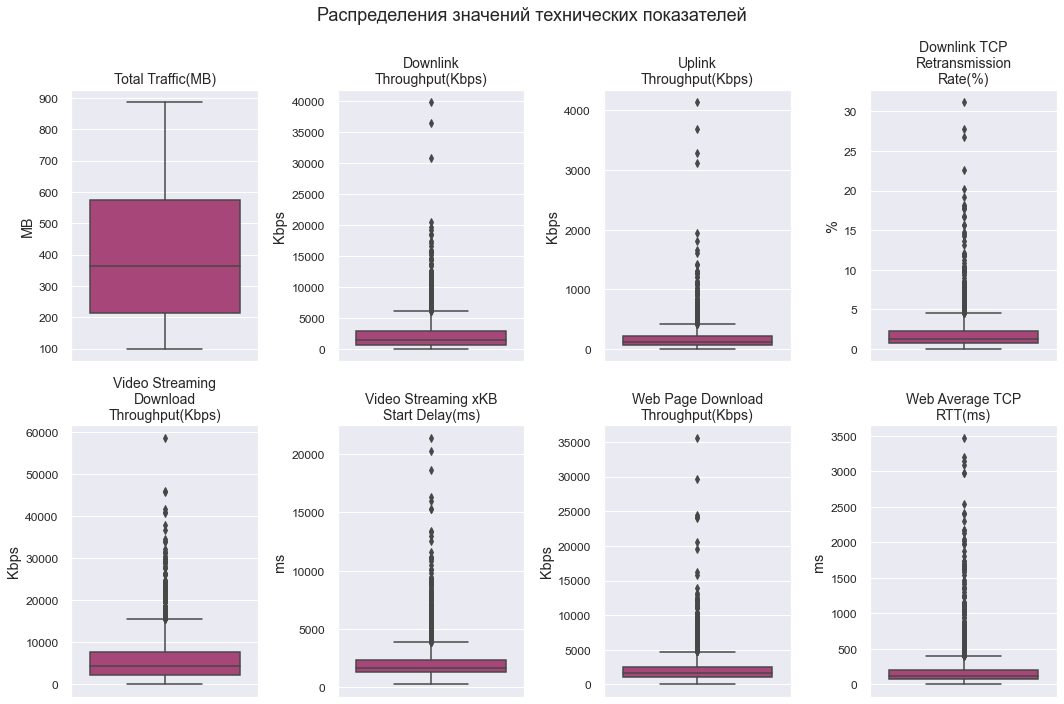

In [20]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
plt.suptitle("Распределения значений технических показателей", fontsize=18)

for column, ax in zip(df_clear.iloc[:, 2:].columns, axes.ravel()):
    sns.boxplot(y=df_clear[column], ax=ax, palette="magma").set_title(
        "\n".join(wrap(column, 20)), fontsize=14
    )
    ax.set_ylabel(re.findall(r"\((\S+)\)", column)[0])
    ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

В данных наблюдается большое количество выбросов. Исследуем наши данные поглубже для выявления аномалий, зависимостей и так далее.

## 3.1 Анализ Q1

### Постановка задачи:
Необходимо выявить параметры, которые оказывают наиболее значимое влияние на уровень оценок опроса Q1 и протестировать зависимости оценок Q1 от технических параметров услуг.

Посмотрим на распределение ответов `Q1`. Так как мы имеем 10-ти бальную шкалу, будем использовать barplot, чтобы была возможность визуально оценить, насколько на самом деле велика разница в количестве оценок.

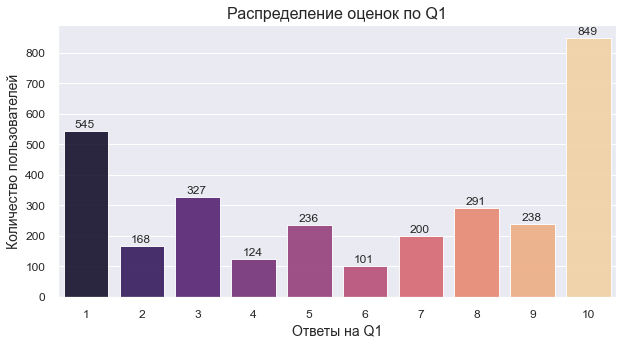

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.barplot(
    x=df_clear["Q1"].value_counts().index,
    y=df_clear["Q1"].value_counts().values,
    ax=ax,
    alpha=0.9,
    palette="magma"
)

ax.set_xlabel("Ответы на Q1", fontsize=14)
ax.set_ylabel("Количество пользователей", fontsize=14)
ax.set_title("Распределение оценок по Q1", fontsize=16)

# Подпишем каждый столбец количеством проставленных оценок
for i in ax.patches:
    ax.text(
        y=i.get_height() + 10,
        x=i.get_x() + 0.2,
        s=str(int(i.get_height())),
        fontsize=12,
    )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Можно заметить, что большое количество клиентов довольны качеством обслуживания — оценок 10 больше всего, но при этом 2ое место по количеству занимает оценка 1, что не является хорошим показателем.

Посмотрим на корреляционную матрицу, чтобы выявить зависимости между оценками и качеством предоставляемых услуг.

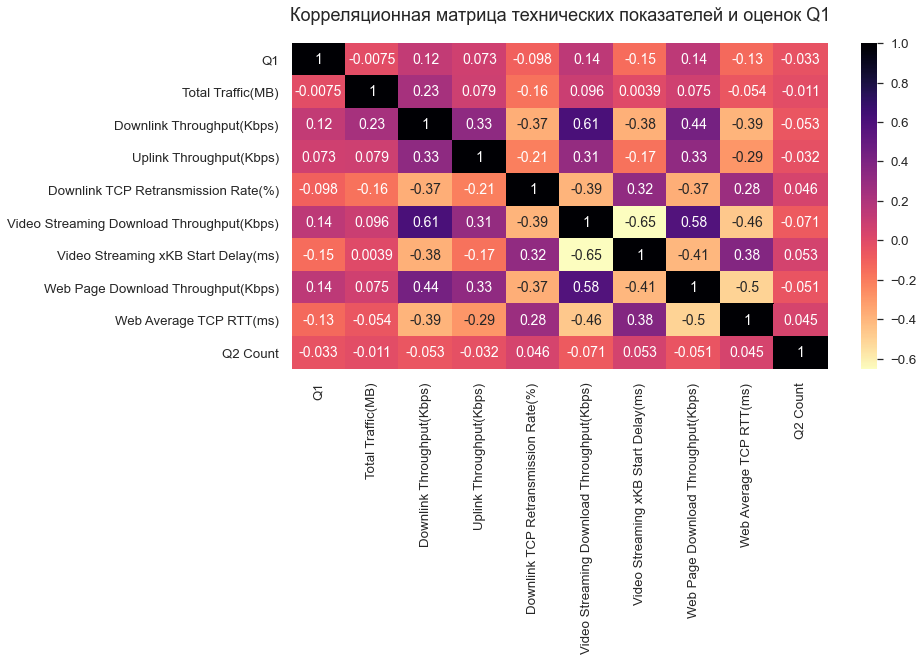

In [22]:
# Корреляция
corr = df_clear.corr(method="spearman")

fig = plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap="magma_r")
plt.title(
    "Корреляционная матрица технических показателей и оценок Q1", fontsize=18, y=1.05
)
fig.savefig("%%!")
plt.show()

Явной корреляции между значениями оценки качества услуг (Q1) и параметрами связи не обнаружено. Некоторая корреляция присутствует между показателями: 

* Video Streaming Download Throughput(Kbps)
* Video Streaming xKB Start Delay(ms)
* Web Page Download Throughput(Kbps)
* Web Average TCP RTT(ms)  

Возможно, повышение качества одного из технических показателей, повлечет за собой изменения и в других параметрах сети, стоит обратить на это внимание.

Далее посмотрим на тенденции медианных показателей в разрезе оценок на 1ый вопрос на линейных графиках. Это позволит нам подробнее изучить зависимости оценок от различных технических показателей и возможно обнаружить необычные зависимости, которые не удалось распознать с помощью корреляционной матрицы.

In [23]:
# Создадим список технических показателей и датафрейм с медианными значениями показателей
features = df_clear.columns.drop(["Q1", "Q2", "Q2 Count"])
df_features_median = df_clear.groupby("Q1")[features].median()

In [24]:
# Создадим цветовую палитру для визуализации
cmap = sns.color_palette("magma_r", 8, as_cmap=True)
my_cmap = []

for i in range(0, 256, 32):
    my_cmap.append(rgb2hex(cmap(i)))

fig = px.line(
    data_frame=df_features_median,
    x=df_features_median.index,
    y=features,
    labels={
        "value": "Значение показателя",
        "variable": "Показатели",
        "Q1": "Оценка по 1ому вопросу (Q1)",
    },
    title="Медианные технические показатели в разрезе оценок по 1ому вопросу",
    template="seaborn",
    color_discrete_sequence=my_cmap,
)

fig.update_traces(line=dict(width=3))

fig.show()

* `Total Traffic(MB)` — объем трафика передачи данных (сумма за период в одну неделю перед участием в опросе).  
Очевидной зависимости между объемом трафика и оценкой за качество услуг не наблюдается. Клиенты, оценившие качество услуг на средние оценки **(4 – 6)**, более активно используют мобильный интернет. <br><br>

* `Downlink Throughput(Kbps)` — средняя скорость «к абоненту».  
Наблюдается зависимость, близкая к прямой, между оценкой и средней скоростью "к абоненту". При этом стоит заметить, что у клиентов, оценивших качество услуг **на 6**, средняя скорость выше, чем у клиентов, поставивших максимальные оценки. <br><br>

* `Uplink Throughput(Kbps)`— средняя скорость «от абонента».  
Также наблюдается некоторая зависимость – с увеличением средней скорости "от абонента" оценка качества услуг тоже увеличивается. При этом снова можно заметить аномально высокую среднюю скорость "от абонента" в области **оценки 6**.<br><br>

* `Downlink TCP Retransmission Rate(%)` — частота переотправок пакетов «к абоненту».  
Можно заметить обратную зависимость: те абоненты, у которых меньше ошибок со связью, поставили более высокие оценки. <br><br>

* `Video Streaming Download Throughput(Kbps)` — скорость загрузки потокового видео.  
График очень скачкообразный, что дает сделать четких выводов о том, есть ли какая-то зависимость между оценками клиентов и данный показателем. В среднем, чем выше скорость загрузки видео – тем лучше клиенты оценивают качество предоставляемых услуг.<br><br>

* `Video Streaming xKB Start Delay(ms)` — задержка старта воспроизведения видео.  
Обратная зависимость: чем меньше задержка и чем быстрее грузится видео, тем выше оценки клиентов.<br><br>

* `Web Page Download Throughput(Kbps)` — скорость загрузки web-страниц через браузер.  
С ростом скорости загрузки, оценка клиентов также повышается.<br><br>

* `Web Average TCP RTT(ms)` — пинг при просмотре web-страниц.  
Чем меньше пинг, тем быстрее загружаются веб-страницы и тем лучше оценки клиентов. В области **оценки 2** можно заметить анамально низкие значения данного параметра.<br>

## 3.2 Анализ Q2

### Постановка задачи
Необходимо выявить причины `Q2`, по которым клиенты компании "Мегафон", оценившие услуги компании меньше, чем на 9 баллов, испытывают бОльшую неудовлетворенность качеством услуг, а также определить уровень неудовлетворенности клиентов в каждой категории.

Для начала раскодируем наши варианты отвтетов на 2ой вопрос (Q2), чтобы легче ориентироваться в дальнейшем.

In [25]:
answers = {
    0: "0. Нет ответа",
    1: "1. Недозвоны, обрывы при звонках",
    2: "2. Время ожидания гудков при звонке",
    3: "3. Плохое качество связи в зданиях",
    4: "4. Медленный мобильный интернет",
    5: "5. Медленная загрузка видео",
    6: "6. Затрудняюсь ответить",
    7: "7. Свой вариант",
}

df_bad_clear_exploded["Q2"] = df_bad_clear_exploded["Q2"].map(answers)

Посмотрим на распределение ответов Q2, чтобы определить, качество каких услуг вызывает больше всего вопросов у клиентов.

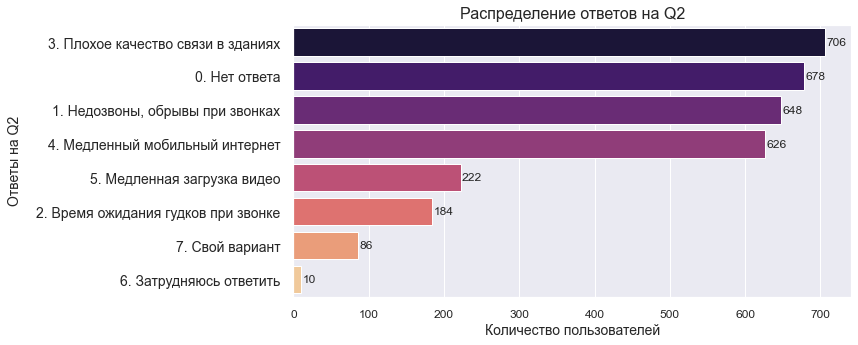

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.barplot(
    x=df_bad_clear_exploded["Q2"].value_counts().values,
    y=df_bad_clear_exploded["Q2"].value_counts().index,
    palette="magma",
)

for i in ax.patches:
    ax.text(
        x=i.get_width() + 2, y=i.get_y() + 0.5, s=str(int(i.get_width())), fontsize=12
    )

plt.title("Распределение ответов на Q2", fontsize=16)
plt.xlabel("Количество пользователей", fontsize=14)
plt.ylabel("Ответы на Q2", fontsize=14, labelpad=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

plt.show()

Также посмотрим на сводный датафрейм и вероятностное распределение оценок в разрезе ответов на 2ой вопрос. Это поможет нам понять, какие оценки (Q1) превалировали в каждой категории ответов Q2 и точнее определить, насколько недовольны клиенты качеством предоставляемых услуг из данной категории.

In [27]:
# Посчитаем средние оценки Q1 в разрезе ответов на Q2
df_q2_mean = (
    df_bad_clear_exploded.groupby(["Q2"])
    .agg({"Q1": "mean"})
    .rename(columns={"Q1": "Средняя оценка Q1"})
)
# Раскрасим полученный датафрейм для более легкого восприятия
df_q2_mean.round(2).style.background_gradient(cmap="magma", low=0, high=0.7)

* Средние оценки по Q1 в разрезе ответов на Q2 распределяются достаточно равномерно *(3.6 - 3.9)*. 
* Клиенты, которые выбрали вариант `6. Затрудняюсь ответить` больше довольны услугами компании, чем все те, кто выбрал другие варианты. 
* Клиенты, которые ответили на 2ой вопрос `7. Свой вариант` больше всех недовольны услугами компании.

In [28]:
# Отсортируем датафрейм для более удобной визуализации
df_bad_clear_sorted = df_bad_clear_exploded.sort_values(["Q1", "Q2"])

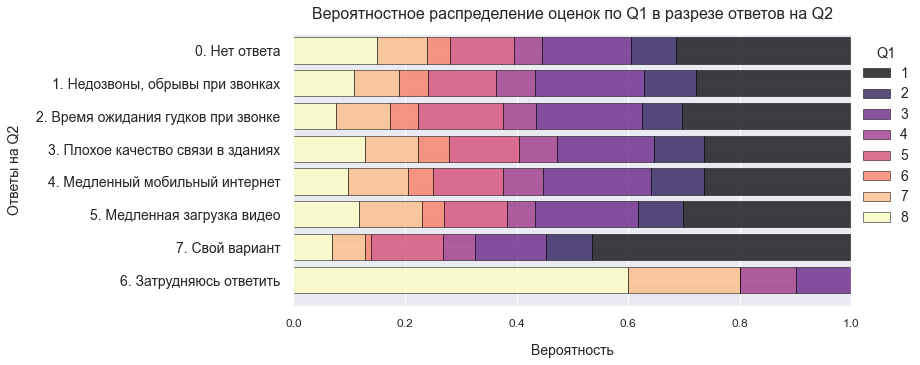

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.histplot(
    y="Q2",
    hue="Q1",
    hue_order=range(1, 9),
    multiple="fill",
    data=df_bad_clear_sorted,
    shrink=0.8,
    discrete=True,
    stat="probability",
    linewidth=0.5,
    palette="magma",
    ax=ax,
    edgecolor="black"
)

ax.set_xlabel("Вероятность", fontsize=14, labelpad=15)
ax.set_ylabel("Ответы на Q2", fontsize=14, labelpad=15)

plt.setp(ax.get_legend(), bbox_to_anchor=(1, 1))
plt.setp(ax.get_legend().get_texts(), fontsize=14)
plt.setp(ax.get_xticklabels(), fontsize=12)
plt.setp(ax.get_yticklabels(), fontsize=14)

plt.title(
    "Вероятностное распределение оценок по Q1 в разрезе ответов на Q2",
    fontsize=16,
    pad=15,
)

plt.show()

* Топ-3 причины, которые не позволили клиентам оставить положительные оценки:
    * _3. Плохое качество связи в зданиях_
    * _1. Недозвоны, обрывы при звонках_
    * _4. Медленный мобильный интернет_<br><br>
    
* 678 клиентов не сформулировали ответ (`0. Нет ответа`) на 2ой вопрос о причинах неудовлетворённости качеством связи. Судя по вероятностному распределению, большинство из этих клиентов недовольны качеством предоставляемых услуг.
* 86 клиентов выбрали в качестве ответа на 2ой вопрос `7. Свой вариант` (при этом дополнительных комментариев оставлено не было), большинство клиентов в этой категории очень недовольны услугами компании и поставили *оценку 1*. Возможно, этих клиентов не устраивает качество услуг в целом или они столкнулись с какой-то уникальной проблемой и поэтому не смогли выбрать из списка подходящие причины неудовлетворенности.
* Среди клиентов, которые не смогли четко ответить на 2ой вопрос и выбрали вариант `6. Затрудняюсь ответить`, абсолютное большинство – практически полностью довольные клиенты, которые поставили *оценки 7 и 8*, отвечая на 1ый вопрос, что подтверждает прежнее умозаключение.

Так как логически отсутствие ответа можно приравнять к затруднению с ответом, совместим в нашем основном датафрейме позиции `0. Нет ответа` и `6. Затрудняюсь ответить`. 

In [30]:
df_clear_exploded = df_clear.explode("Q2")
df_clear_exploded.loc[df_clear_exploded["Q2"] == 0, "Q2"] = 6
df_clear_exploded.loc[df_clear_exploded["Q1"] >= 9, "Q2"] = 0

Изменим категории ответов в соответсвии с внесенными изменениями и заново раскодируем датафрейм.

In [31]:
markup = {
    0: "0. Доволен качеством услуг",
    1: "1. Недозвоны, обрывы при звонках",
    2: "2. Время ожидания гудков при звонке",
    3: "3. Плохое качество связи в зданиях",
    4: "4. Медленный мобильный интернет",
    5: "5. Медленная загрузка видео",
    6: "6. Затрудняюсь ответить",
    7: "7. Свой вариант",
}

df_clear_exploded["Q2"] = df_clear_exploded["Q2"].map(markup)

In [32]:
# Посчитаем средние оценки Q1 в разрезе обновленных категорий ответов на Q2
df_q2_mean_2 = (
    df_clear_exploded.groupby(["Q2"])
    .agg({"Q1": "mean"})
    .rename(columns={"Q1": "Средняя оценка Q1"})
)
# Раскрасим полученный датафрейм для более легкого восприятия
df_q2_mean_2.round(2).style.background_gradient(cmap="magma", low=0.2, high=1)

* Ответы категории `6. Затрудняюсь ответить` теперь так же попадают в ранее отмеченный диапазон 3.6 - 3.9.
* В категории `0. Доволен качеством услуг` оценка Q1 сильно выше (стремится к 10), чем в остальных категориях, что соответствует нашим ожиданиям.

Посмотрим на распределение количества причин неудовлетворения в вопросе Q2 среди недовольных клиентов, чтобы определить, наблюдается ли зависимость: чем больше причин клиент отметил во 2ом вопросе, тем он больше недоволен услугами компании и тем ниже его оценка?

In [33]:
df_Q2_count = df_bad_clear.groupby("Q2 Count")["Q2 Count"].count()

In [34]:
def pie_labels(pct, allvals):
    absolute = int(round(pct / 100.0 * np.sum(allvals)))
    return "{:.1f}%\n({:d} чел.)".format(pct, absolute)

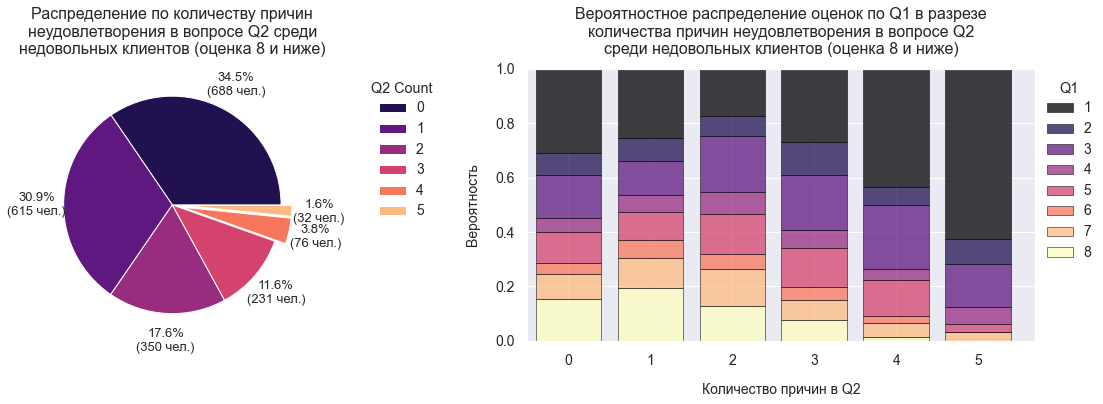

In [35]:
_, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].pie(
    df_Q2_count,
    autopct=lambda pct: pie_labels(pct, df_Q2_count.values),
    pctdistance=1.25,
    labeldistance=0.7,
    textprops=dict(fontsize=13),
    explode=(0, 0, 0, 0, 0.1, 0.1)
)

ax[0].set_title(
    "\n".join(
        wrap(
            "Распределение по количеству причин неудовлетворения \
в вопросе Q2 среди недовольных клиентов (оценка 8 и ниже)",
            45,
        )
    ),
    fontsize=16,
    pad=15,
)
ax[0].legend(labels=df_Q2_count.index, title='Q2 Count')
plt.setp(ax[0].get_legend(), bbox_to_anchor=(1.5, 1))
plt.setp(ax[0].get_legend().get_texts(), fontsize=14)

sns.histplot(
    x="Q2 Count",
    hue="Q1",
    hue_order=range(1, 9),
    multiple="fill",
    data=df_bad_clear,
    shrink=0.8,
    discrete=True,
    stat="probability",
    linewidth=0.5,
    palette="magma",
    ax=ax[1],    
    edgecolor="black"
)

ax[1].set_ylabel("Вероятность", fontsize=14, labelpad=15)
ax[1].set_xlabel("Количество причин в Q2", fontsize=14, labelpad=15)

plt.setp(ax[1].get_legend(), bbox_to_anchor=(1, 1))
plt.setp(ax[1].get_legend().get_texts(), fontsize=14)
plt.setp(ax[1].get_xticklabels(), fontsize=14)
plt.setp(ax[1].get_yticklabels(), fontsize=14)

ax[1].set_title(
    "\n".join(
        wrap(
            "Вероятностное распределение оценок по Q1 в разрезе \
количества причин неудовлетворения в вопросе Q2 среди недовольных клиентов (оценка 8 и ниже)",
            50,
        )
    ),
    fontsize=16,
    pad=15,
)

plt.show()

* Большая часть недовольных клиентов *34.5% (688 человек)* вообще не дали ответ на 2ой вопрос или оставили ответ `6. Затрудняюсь ответить`, что соответствует *значению 0* в качестве количества указанных причин неудовлетворения услугами в нашем анализе.
* Недовольные по какой-то одной причине клиенты занимают 2ое место в нашем распределении – *31% (615 человек)*.
* В целом, чем больше причин указали клиенты, тем больше они недовольны *(оценки 7-8 можно считать положительными, остальные — отрицательными)*, что полностью соответсвует нашим представлениям. Клиенты, недовольные качеством услуг, склонны не участвовать в опросах вообще или оставлять неполные ответы, поэтому среди клиентов, которые не указали ни одной причины, больше недовольных.

# 4. A/B  - тестирование

## 4.1 По вопросу Q1: гипотеза №1 

Для дальнейшей работы разделим респондентов на группы:

* `Группа А` — клиенты, которые оценили качество услуг (по результатам Q1) на *9 или 10 баллов*.  
* `Группа В` — клиенты, которые оценили качество услуг (по результатам Q1) на *8 баллов и ниже*.

### Общая гипотеза: 
**Технические показатели в группе клиентов, оценивших качество предоставляемых услуг в первом вопросе Q1 на `высокие оценки 9 и 10`, не отличаются от показателей в группе клиентов, которые оценили качество услуг на `оценку 8 и ниже`.**

Посмотрим на распределения по группам и визуально оценим разницу между ними.

In [36]:
A = df[df["Q1"].isin([9, 10])].drop(["Q2"], axis=1)
B = df[~df["Q1"].isin([9, 10])].drop(["Q2"], axis=1)

In [37]:
df_groups = df_clear.copy()
df_groups["Group"] = np.where(df_clear["Q1"].isin([9, 10]), "A: Q1 ≥ 9", "B: Q1 ≤ 8")
df_groups.sort_values("Group", inplace=True)

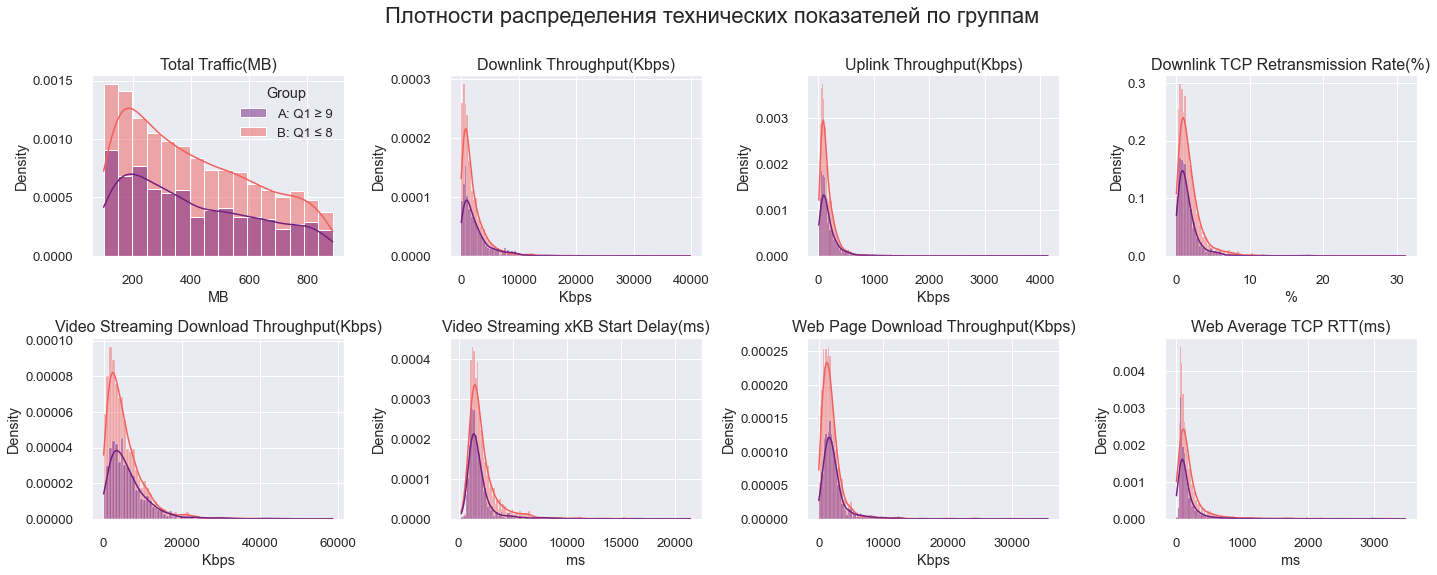

In [38]:
# Визуализация распределения признаков
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
fig.suptitle(
    "Плотности распределения технических показателей по группам", y=1, fontsize=22
)

for ax, feature in zip(axes.ravel(), features):

    sns.histplot(
        data=df_groups,
        x=feature,
        hue="Group",
        stat="density",
        ax=ax,
        alpha=0.5,
        kde=True,
        palette="magma",
    )

    ax.set_title(feature, fontsize=16)
    ax.tick_params(size=12)
    ax.set_xlabel(re.findall(r"\((\S+)\)", feature)[0])
    if ax != axes[0][0]:
        ax.get_legend().remove()

plt.tight_layout()
plt.show()

Плотности распределений двух групп имеют некоторые различия. Распределения обеих групп скошены вправо, есть длинные хвосты (большое количество выбросов, которое мы наблюдали ранее на графиках boxplot).

Проведем A/B-тесты и сравним все технические показатели по группам. Так как наши распределения далеки от нормальных, имеется большое количество выбросов, будем использовать бутстрап.

### A/B тесты:

In [39]:
def bootstrap(data, size=1000, N=5000, func=np.mean):
    result = []
    size = min(len(data), size)
    for _ in range(N):
        if len(data.shape) > 1:
            ind = np.random.choice(np.arange(data.shape[0]), size=(size,))
            subsample = data.iloc[ind]
        else:
            subsample = np.random.choice(data, size=(size,))
        stat = func(subsample)
        result.append(stat)
    return result

In [40]:
def AB_test(data_A, data_B, N=5000, func=np.mean, title=""):
    """Conducts an A/B test using a bootstrap and draws graphs of the test performed.

    :param N: the number of iterations for which we calculate the difference (5000 by default)
    :type N: int
    :param func: the metric for which the difference in values is calculated (np.mean by default)
    :type func: function
    :param title: the name of the parameter that we are testing ("" by default)
    :type title: str"""

    the_more_the_worse = [
        "Downlink TCP Retransmission Rate(%)",
        "Video Streaming xKB Start Delay(ms)",
        "Web Average TCP RTT(ms)",
    ]

    samples_a = bootstrap(data_A, func=func)
    samples_b = bootstrap(data_B, func=func)

    p_buf = func(data_B) - func(data_A)
    buf = []

    for _ in range(N):
        a_sample = data_A.sample(1000, replace=True)
        b_sample = data_B.sample(1000, replace=True)
        buf.append(func(b_sample) - func(a_sample))
    centered_buf = buf - np.mean(buf)

    if title in the_more_the_worse:
        p_value = sum(centered_buf >= p_buf) / N
    else:
        p_value = sum(centered_buf <= p_buf) / N

    #
    color_a = "#ED3431"
    color_b = "#6E2158"
    color_res = "#FC834A"

    # Инициализация полотна
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(title + f"\np_value = {p_value:.3}", y=1.1, fontsize=14)

    # Графики распределения по группам А и Б
    sns.histplot(
        samples_a,
        alpha=0.5,
        color="#f1605d",
        ax=ax[0],
        kde=True,
        stat="density",
        bins=30,
        label="A",
    )

    sns.histplot(
        samples_b,
        alpha=0.5,
        color="#9e2f7f",
        ax=ax[0],
        kde=True,
        stat="density",
        bins=30,
        label="B",
    )

    # Интервалы и медиана
    ax[0].axvline(
        np.percentile(samples_a, 2.5), linestyle="-", color=color_a, linewidth=3
    )
    ax[0].axvline(
        np.percentile(samples_a, 97.5), linestyle="-", color=color_a, linewidth=3
    )
    ax[0].axvline(np.median(samples_a), linestyle=":", color=color_a, linewidth=3)

    ax[0].axvline(
        np.percentile(samples_b, 2.5), linestyle="-", color=color_b, linewidth=3
    )
    ax[0].axvline(
        np.percentile(samples_b, 97.5), linestyle="-", color=color_b, linewidth=3
    )
    ax[0].axvline(np.median(samples_b), linestyle=":", color=color_b, linewidth=3)

    ax[0].set_title(
        "Плотность распределения показателя в группах A и B\n(+ доверительные интервалы и медиана)",
        fontsize=14,
    )
    ax[0].set_ylabel("Плотность")
    if title != "":
        ax[0].set_xlabel(re.findall(r"\((\S+)\)", title)[0])
    ax[0].legend()

    # График распределения разности по группам А и Б
    sns.histplot(
        centered_buf,
        alpha=0.5,
        ax=ax[1],
        kde=True,
        stat="density",
        color="#feca8d",
    )

    # Интервалы
    ax[1].axvline(
        np.percentile(centered_buf, 2.5),
        color=color_res,
        linewidth=3,
        label="Граница доверительного\nинтервала:\n"
        + f"min = {np.percentile(centered_buf, 2.5):.2f}; "
        + f"max = {np.percentile(centered_buf, 97.5):.2f}",
    )
    ax[1].axvline(np.percentile(centered_buf, 97.5), color=color_res, linewidth=3)
    ax[1].axvline(
        p_buf,
        linestyle="--",
        color="#8D2A71",
        linewidth=3,
        label="Разница, полученная\nна реальных данных",
    )

    ax[1].set_title("Плотность разницы средних значений\n(центрированная)", fontsize=14)
    ax[1].set_ylabel("Плотность")
    if title != "":
        ax[1].set_xlabel(re.findall(r"\((\S+)\)", title)[0])
    ax[1].legend(bbox_to_anchor=(1, 1))

    return plt.show()

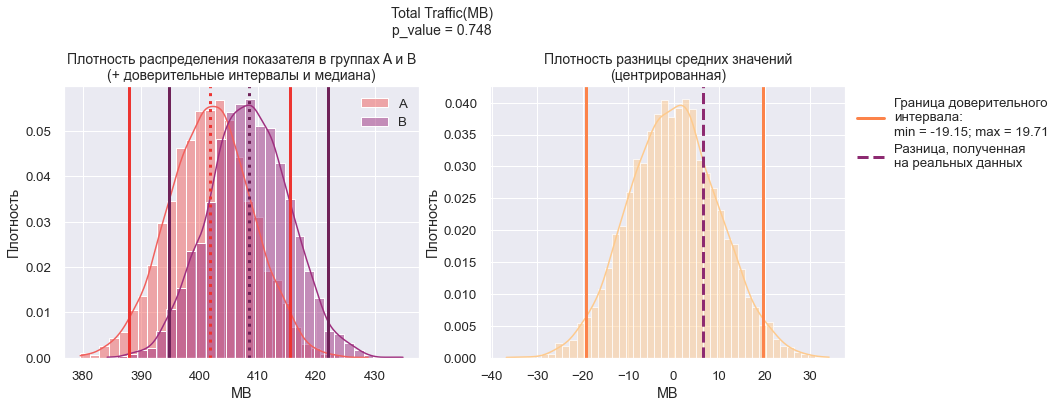

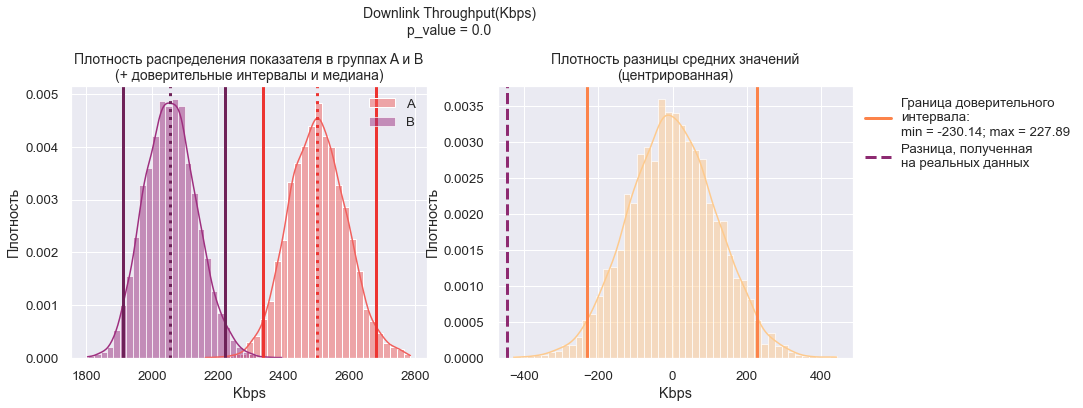

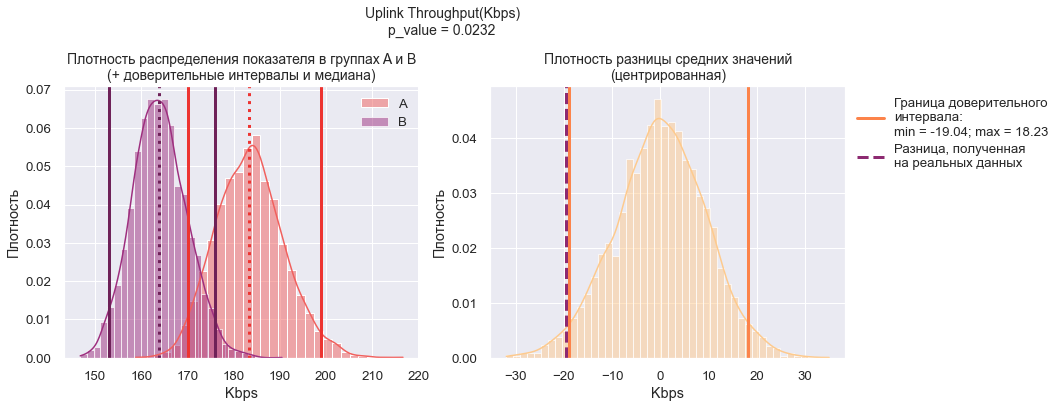

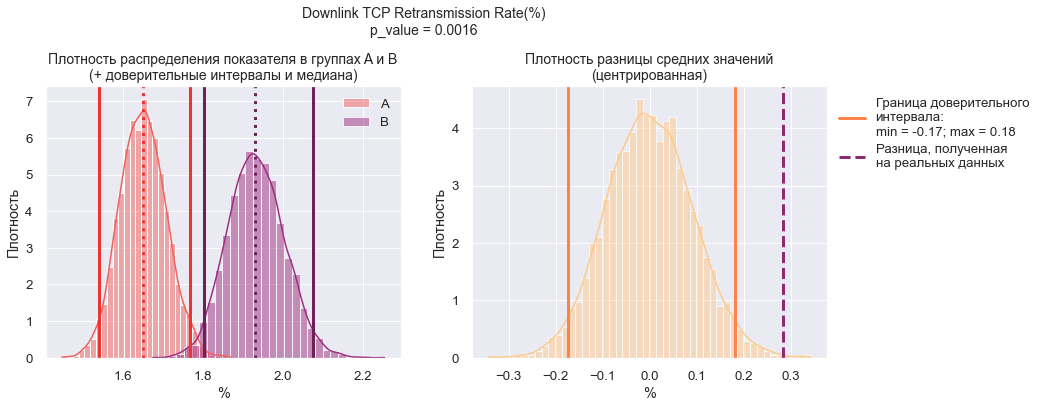

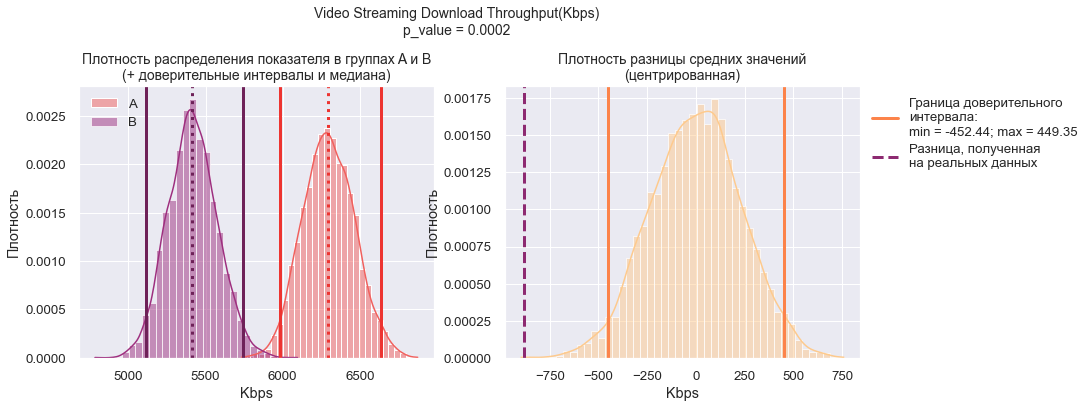

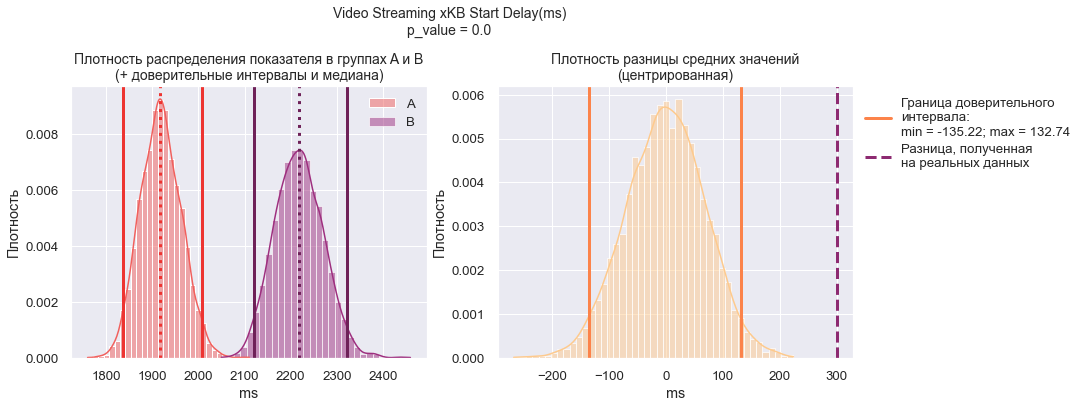

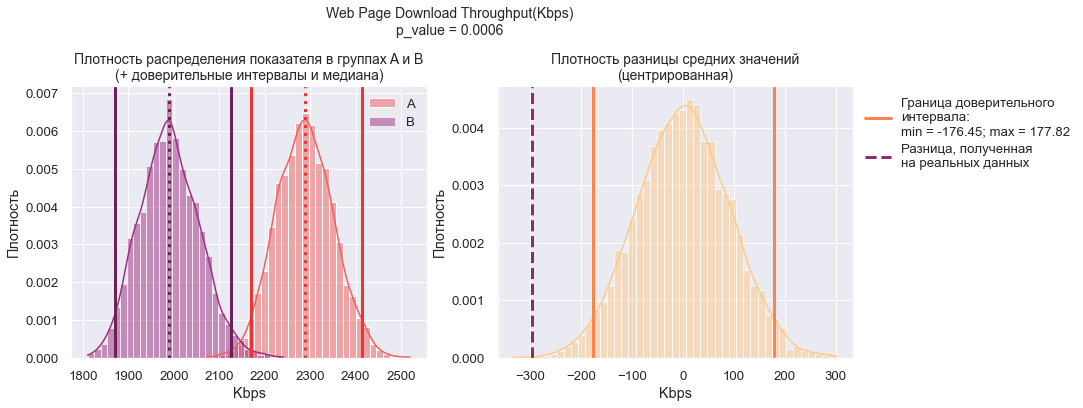

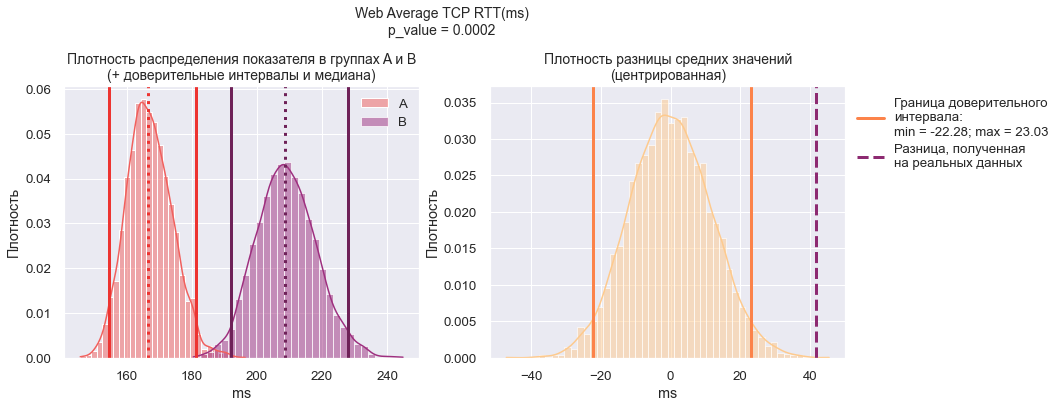

In [41]:
for feature in A.columns[1:]:
    AB_test(A[feature], B[feature], title=feature, func=np.mean)

Мы получили статистически значимые различия в 7 из 8 случаев. Дополнительно воспользуемся проверкой t-критерия Уэлча (модификация t-критерия для выборок с разными дисперсиями), чтобы удостовериться в достоверности полученных результатов.

In [42]:
def printmd(string):
    display(Markdown(string))

In [43]:
printmd("**ttest_ind p_value:** \n")

for feature in A.columns[1:]:
    t, p_value_t = ttest_ind(A[feature], B[feature], equal_var=False)
    print(f"{feature}: {p_value_t:.4f}")

**ttest_ind p_value:** 


Total Traffic(MB): 0.4329
Downlink Throughput(Kbps): 0.0000
Uplink Throughput(Kbps): 0.0175
Downlink TCP Retransmission Rate(%): 0.0001
Video Streaming Download Throughput(Kbps): 0.0000
Video Streaming xKB Start Delay(ms): 0.0000
Web Page Download Throughput(Kbps): 0.0001
Web Average TCP RTT(ms): 0.0000


**1. Total Traffic(MB)**  
${H_{0}: TT_{A:\ Q1\ ≥\ 9} = TT_{B:\ Q1\ ≤\ 8}}$.  
*Нулевая гипотеза: Объем трафика передачи данных среди клиентов, которые поставили высокие (9-10) оценки, и клиентов, которые поставили оценки ниже (8 и ниже) не отличается.*   
Доверительные интервалы пересекаются. p_value > 0.05. На имеющихся данных на 5%-ом уровне значимости нет оснований отвергнуть нулевую гипотезу о том, что объем трафика передачи данных в группах не отличается.<br><br>

**2. Downlink Throughput(Kbps)**  
${H_{0}: DT_{A:\ Q1\ ≥\ 9} = DT_{B:\ Q1\ ≤\ 8}}$  
*Нулевая гипотеза: Cредняя скорость «к абоненту» среди клиентов, которые поставили высокие (9-10) оценки, и клиентов, которые поставили оценки ниже (8 и ниже) не отличается.*   
Доверительные интервалы не пересекаются. p_value < 0.05. На имеющихся данных на 5%-ом уровне значимости есть основания отвергнуть нулевую гипотезу о том, что средняя скорость «к абоненту» в группах не отличается.<br><br>

**3. Uplink Throughput(Kbps)**  
${H_{0}: UT_{A:\ Q1\ ≥\ 9} = UT_{B:\ Q1\ ≤\ 8}}$  
*Нулевая гипотеза: Cредняя скорость «от абонента» среди клиентов, которые поставили высокие (9-10) оценки, и клиентов, которые поставили оценки ниже (8 и ниже) не отличается.*   
Доверительные интервалы пересекаются. p_value < 0.05. На имеющихся данных на 5%-ом уровне значимости  есть основания отвергнуть нулевую гипотезу о том, что средняя скорость «от абонента» в группах не отличается.<br><br>

**4. Downlink TCP Retransmission Rate(%)**  
${H_{0}: DTCPRR_{A:\ Q1\ ≥\ 9} = DTCPRR_{B:\ Q1\ ≤\ 8}}$  
*Нулевая гипотеза: Частота переотправок пакетов «к абоненту» среди клиентов, которые поставили высокие (9-10) оценки, и клиентов, которые поставили оценки ниже (8 и ниже) не отличается.*   
Доверительные интервалы не пересекаются. p_value < 0.05. На имеющихся данных на 5%-ом уровне значимости есть основания отвергнуть нулевую гипотезу о том, что частота переотправок пакетов «к абоненту» в группах не отличается.<br><br>

**5. Video Streaming Download Throughput(Kbps)**  
${H_{0}: VSDT_{A:\ Q1\ ≥\ 9} = VSDT_{B:\ Q1\ ≤\ 8}}$  
*Нулевая гипотеза: Скорость загрузки потокового видео среди клиентов, которые поставили высокие (9-10) оценки, и клиентов, которые поставили оценки ниже (8 и ниже) не отличается.*   
Доверительные интервалы не пересекаются. p_value < 0.05. На имеющихся данных на 5%-ом уровне значимости есть основания отвергнуть нулевую гипотезу о том, что скорость загрузки потокового видео в группах не отличается.<br><br>

**6. Video Streaming xKB Start Delay(ms)**  
${H_{0}: VSSD_{A:\ Q1\ ≥\ 9} = VSSD_{B:\ Q1\ ≤\ 8}}$  
*Нулевая гипотеза: Задержка старта воспроизведения видео среди клиентов, которые поставили высокие (9-10) оценки, и клиентов, которые поставили оценки ниже (8 и ниже) не отличается.*   
Доверительные интервалы не пересекаются. p_value < 0.05. На имеющихся данных на 5%-ом уровне значимости есть основания отвергнуть нулевую гипотезу о том, что задержка старта воспроизведения видео в группах не отличается.<br><br>

**7. Web Page Download Throughput(Kbps)**  
${H_{0}: WPDT_{A:\ Q1\ ≥\ 9} = WPDT_{B:\ Q1\ ≤\ 8}}$  
*Нулевая гипотеза: Скорость загрузки web-страниц через браузер среди клиентов, которые поставили высокие (9-10) оценки, и клиентов, которые поставили оценки ниже (8 и ниже) не отличается.*   
Доверительные интервалы не пересекаются. p_value < 0.05. На имеющихся данных на 5%-ом уровне значимости есть основания отвергнуть нулевую гипотезу о том, что скорость загрузки web-страниц через браузер в группах не отличается.<br><br>

**8. Web Average TCP RTT(ms)**  
${H_{0}: WATCPRTT_{A:\ Q1\ ≥\ 9} = WATCPRTT_{B:\ Q1\ ≤\ 8}}$  
*Нулевая гипотеза: Пинг при просмотре web-страниц среди клиентов, которые поставили высокие (9-10) оценки, и клиентов, которые поставили оценки ниже (8 и ниже) не отличается.*   
Доверительные интервалы не пересекаются. p_value < 0.05. На имеющихся данных на 5%-ом уровне значимости есть основания отвергнуть нулевую гипотезу о том, что пинг при просмотре web-страниц в группах не отличается.<br><br>

### Выводы: 
**7 из 8 метрик качества телекоммуникационных услуг (за исключением Total Traffic(MB)) имеют статистические значимые различия между группами, что говорит об их прямом влиянии на оценки, выставляемые клиентами в процессе прохождения опроса.**

## 4.2 По вопросу Q1: гипотеза №2

* `Группа А` — клиенты, которые оценили качество услуг (по результатам Q1) на *5-8 баллов*.  
* `Группа В` — клиенты, которые оценили качество услуг (по результатам Q1) на *1-4 балла*.

### Общая гипотеза: 
**Технические показатели в группе недовольных клиентов, оценивших качество предоставляемых услуг в первом вопросе Q1 на `оценки 5-8`, не отличаются от показателей в группе недовольных клиентов, которые оценили качество услуг на `оценку 4 и ниже`.**

Посмотрим на распределения по группам и визуально оценим разницу между ними.

In [44]:
A = df_bad_clear[df_bad_clear["Q1"].isin(range(5, 9))].drop(["Q2", "Q2 Count"], axis=1)
B = df_bad_clear[df_bad_clear["Q1"].isin(range(1, 5))].drop(["Q2", "Q2 Count"], axis=1)

In [45]:
df_groups = df_bad_clear.copy()
df_groups["Group"] = np.where(
    df_bad_clear["Q1"].isin(range(5, 9)), "A: Q1 in [5; 8]", "B: Q1 in [1; 4]"
)
df_groups.sort_values("Group", inplace=True)

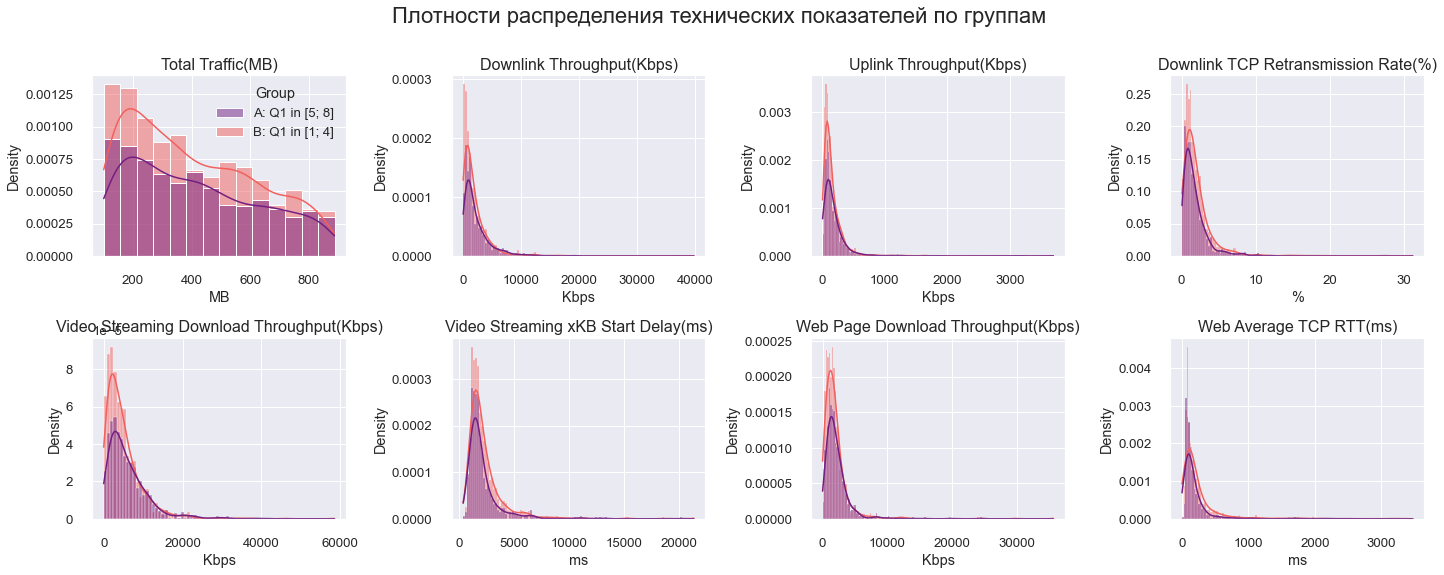

In [46]:
# Визуализация распределения признаков
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
fig.suptitle(
    "Плотности распределения технических показателей по группам", y=1, fontsize=22
)

for ax, feature in zip(axes.ravel(), features):

    sns.histplot(
        data=df_groups,
        x=feature,
        hue="Group",
        stat="density",
        ax=ax,
        alpha=0.5,
        kde=True,
        palette="magma",
    )

    ax.set_title(feature, fontsize=16)
    ax.tick_params(size=12)
    ax.set_xlabel(re.findall(r"\((\S+)\)", feature)[0])
    if ax != axes[0][0]:
        ax.get_legend().remove()

plt.tight_layout()
plt.show()

Как и в 1ом случае, плотности распределений обеих групп скошены вправо, присутствуют длинные хвосты — так же воспользуемся бутстрапом.

### A/B тесты:

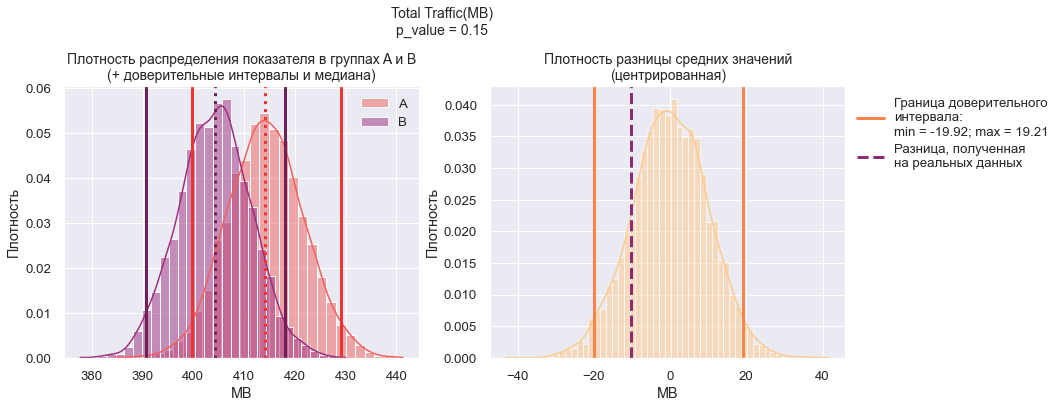

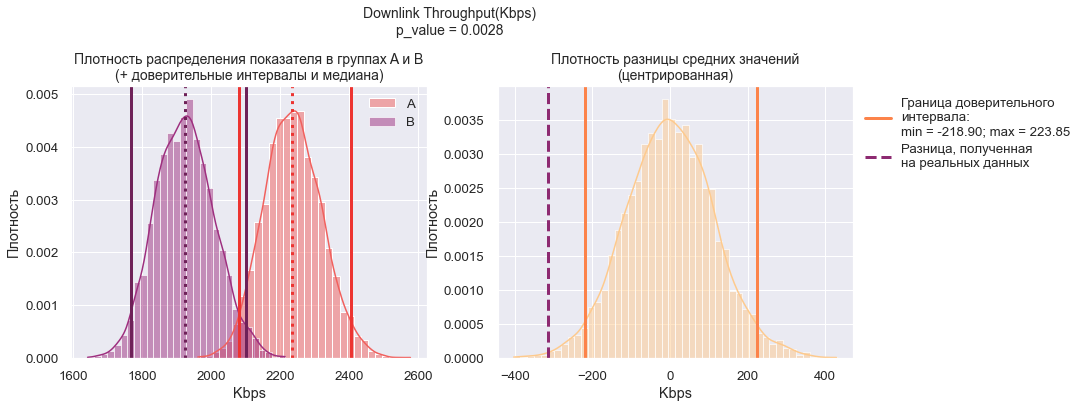

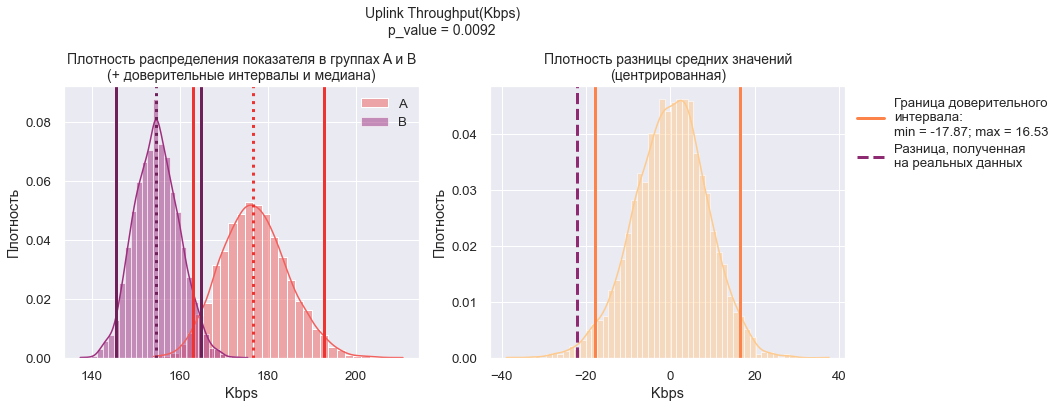

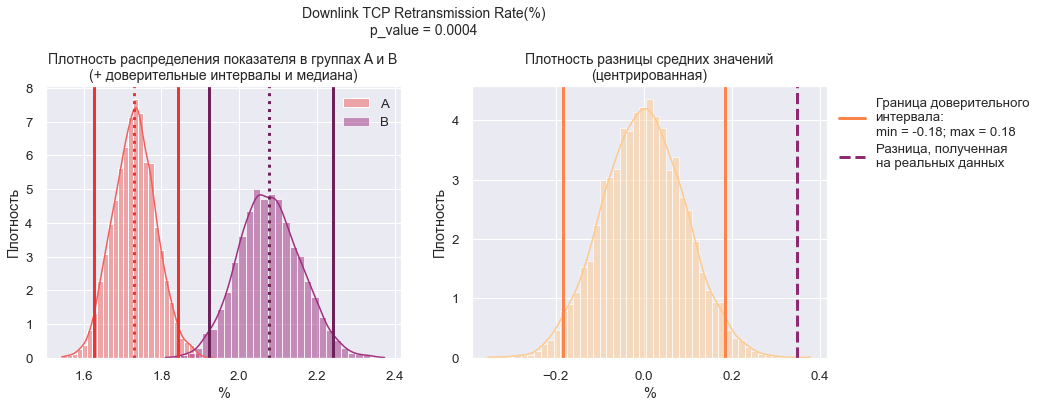

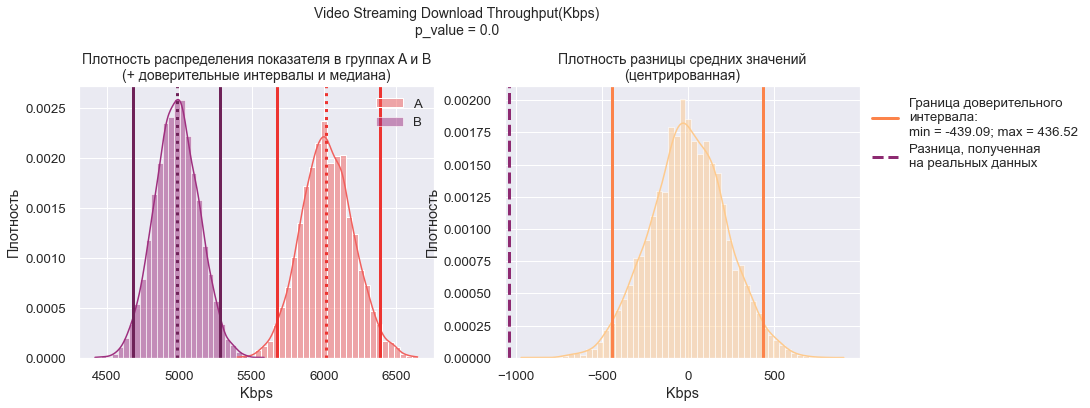

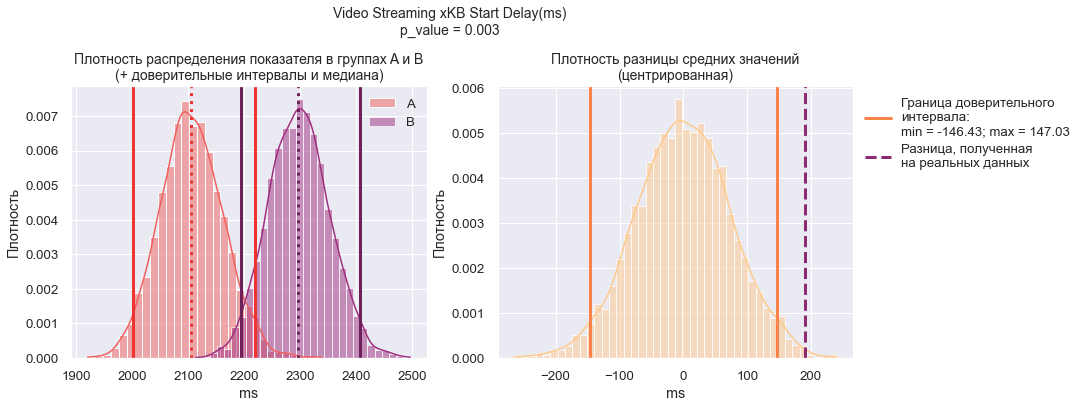

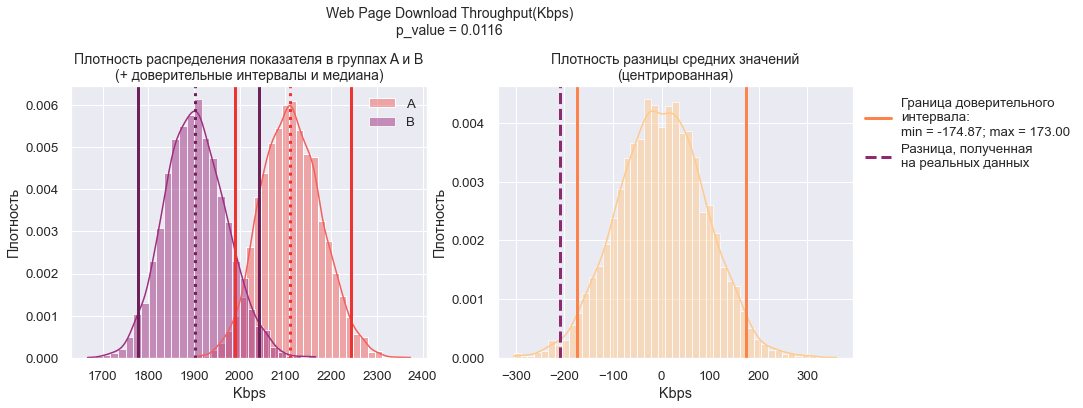

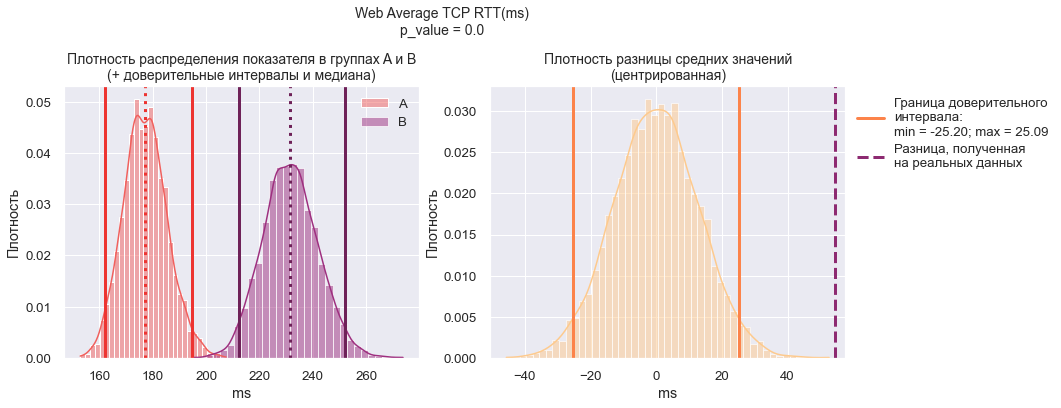

In [47]:
for feature in A.columns[1:]:
    AB_test(A[feature], B[feature], title=feature, func=np.mean)

In [48]:
printmd("**ttest_ind p_value:** \n")

for feature in A.columns[1:]:
    t, p_value_t = ttest_ind(A[feature], B[feature], equal_var=False)
    print(f"{feature}: {p_value_t:.4f}")

**ttest_ind p_value:** 


Total Traffic(MB): 0.3123
Downlink Throughput(Kbps): 0.0055
Uplink Throughput(Kbps): 0.0146
Downlink TCP Retransmission Rate(%): 0.0002
Video Streaming Download Throughput(Kbps): 0.0000
Video Streaming xKB Start Delay(ms): 0.0112
Web Page Download Throughput(Kbps): 0.0228
Web Average TCP RTT(ms): 0.0000


**1. Total Traffic(MB)**  
${H_{0}: TT_{A:\ 5\ ≥\ Q1\ ≥\ 8} = TT_{B:\ Q1\ ≤\ 4}}$.  
*Нулевая гипотеза: Объем трафика передачи данных среди неудовлетворенных клиентов, которые поставили оценки 5-8, и клиентов, которые поставили оценки 1-4 не отличается.*   
Доверительные интервалы пересекаются. p_value > 0.05. На имеющихся данных на 5%-ом уровне значимости нет оснований отвергнуть нулевую гипотезу о том, что объем трафика передачи данных в группах не отличается.<br><br>

**2. Downlink Throughput(Kbps)**  
${H_{0}: DT_{A:\ 5\ ≥\ Q1\ ≥\ 8} = DT_{B:\ Q1\ ≤\ 4}}$  
*Нулевая гипотеза: Cредняя скорость «к абоненту» среди неудовлетворенных клиентов, которые поставили оценки 5-8, и клиентов, которые поставили оценки 1-4 не отличается.*  
Доверительные интервалы немного пересекаются. p_value < 0.05. На имеющихся данных на 5%-ом уровне значимости есть основания отвергнуть нулевую гипотезу о том, что средняя скорость «к абоненту» в группах не отличается.<br><br>

**3. Uplink Throughput(Kbps)**  
${H_{0}: UT_{A:\ 5\ ≥\ Q1\ ≥\ 8} = UT_{B:\ Q1\ ≤\ 4}}$  
*Нулевая гипотеза: Cредняя скорость «от абонента» среди неудовлетворенных клиентов, которые поставили оценки 5-8, и клиентов, которые поставили оценки 1-4 не отличается.*  
Доверительные интервалы немного пересекаются. p_value < 0.05. На имеющихся данных на 5%-ом уровне значимости  есть основания отвергнуть нулевую гипотезу о том, что средняя скорость «от абонента» в группах не отличается.<br><br>

**4. Downlink TCP Retransmission Rate(%)**  
${H_{0}: DTCPRR_{A:\ 5\ ≥\ Q1\ ≥\ 8} = DTCPRR_{B:\ Q1\ ≤\ 4}}$  
*Нулевая гипотеза: Частота переотправок пакетов «к абоненту» среди неудовлетворенных клиентов, которые поставили оценки 5-8, и клиентов, которые поставили оценки 1-4 не отличается.*  
Доверительные интервалы не пересекаются. p_value < 0.05. На имеющихся данных на 5%-ом уровне значимости есть основания отвергнуть нулевую гипотезу о том, что частота переотправок пакетов «к абоненту» в группах не отличается.<br><br>

**5. Video Streaming Download Throughput(Kbps)**  
${H_{0}: VSDT_{A:\ 5\ ≥\ Q1\ ≥\ 8} = VSDT_{B:\ Q1\ ≤\ 4}}$  
*Нулевая гипотеза: Скорость загрузки потокового видео среди неудовлетворенных клиентов, которые поставили оценки 5-8, и клиентов, которые поставили оценки 1-4 не отличается.*  
Доверительные интервалы не пересекаются. p_value < 0.05. На имеющихся данных на 5%-ом уровне значимости есть основания отвергнуть нулевую гипотезу о том, что скорость загрузки потокового видео в группах не отличается.<br><br>

**6. Video Streaming xKB Start Delay(ms)**  
${H_{0}: VSSD_{A:\ 5\ ≥\ Q1\ ≥\ 8} = VSSD_{B:\ Q1\ ≤\ 4}}$  
*Нулевая гипотеза: Задержка старта воспроизведения видео среди неудовлетворенных клиентов, которые поставили оценки 5-8, и клиентов, которые поставили оценки 1-4 не отличается.*  
Доверительные интервалы немного пересекаются. p_value < 0.05. На имеющихся данных на 5%-ом уровне значимости есть основания отвергнуть нулевую гипотезу о том, что задержка старта воспроизведения видео в группах не отличается.<br><br>

**7. Web Page Download Throughput(Kbps)**  
${H_{0}: WPDT_{A:\ 5\ ≥\ Q1\ ≥\ 8} = WPDT_{B:\ Q1\ ≤\ 4}}$  
*Нулевая гипотеза: Скорость загрузки web-страниц через браузер среди неудовлетворенных клиентов, которые поставили оценки 5-8, и клиентов, которые поставили оценки 1-4 не отличается.*  
Доверительные интервалы пересекаются. p_value < 0.05. На имеющихся данных на 5%-ом уровне значимости есть основания отвергнуть нулевую гипотезу о том, что скорость загрузки web-страниц через браузер в группах не отличается.<br><br>

**8. Web Average TCP RTT(ms)**  
${H_{0}: WATCPRTT_{A:\ 5\ ≥\ Q1\ ≥\ 8} = WATCPRTT_{B:\ Q1\ ≤\ 4}}$  
*Нулевая гипотеза: Пинг при просмотре web-страниц среди неудовлетворенных клиентов, которые поставили оценки 5-8, и клиентов, которые поставили оценки 1-4 не отличается.*  
Доверительные интервалы не пересекаются. p_value < 0.05. На имеющихся данных на 5%-ом уровне значимости есть основания отвергнуть нулевую гипотезу о том, что пинг при просмотре web-страниц в группах не отличается.<br><br>

### Выводы: 
**Так же как и в 1ом случае, мы получили статистически значимые различия между группами в 7 из 8 случаев. Это еще раз подтверждает тот факт, что данные метрики влияют на выставляемые клиентами оценки.**

## 4.3 По вопросу Q2: гипотеза №3

* `Группа А` — клиенты, которые поставили оценку 8 и ниже на 1 вопрос Q1, но не оставили никаких жалоб в вопросе Q2.
* `Группа В` — клиенты, которые поставили оценку 8 и ниже на 1 вопрос Q1 и оставили одну или несколько жалоб в вопросе Q2.

### Общая гипотеза:  
**Технические показатели в группе клиентов, `не оставивших жалоб во втором вопросе Q2`, не отличаются от показателей в группе клиентов, которые `оставили 1 и более жалоб во втором вопросе Q2`.**

Посмотрим на распределения по группам и визуально оценим разницу между ними.

In [49]:
A = df_bad_clear[df_bad_clear["Q2 Count"] == 0].drop(["Q2", "Q2 Count"], axis=1)
B = df_bad_clear[df_bad_clear["Q2 Count"] != 0].drop(["Q2", "Q2 Count"], axis=1)

In [50]:
df_groups = df_bad_clear.copy()
df_groups["Group"] = np.where(
    df_bad_clear["Q2 Count"] == 0, "A: Q2 Count = 0", "B: Q2 Count != 0"
)
df_groups.sort_values("Group", inplace=True)

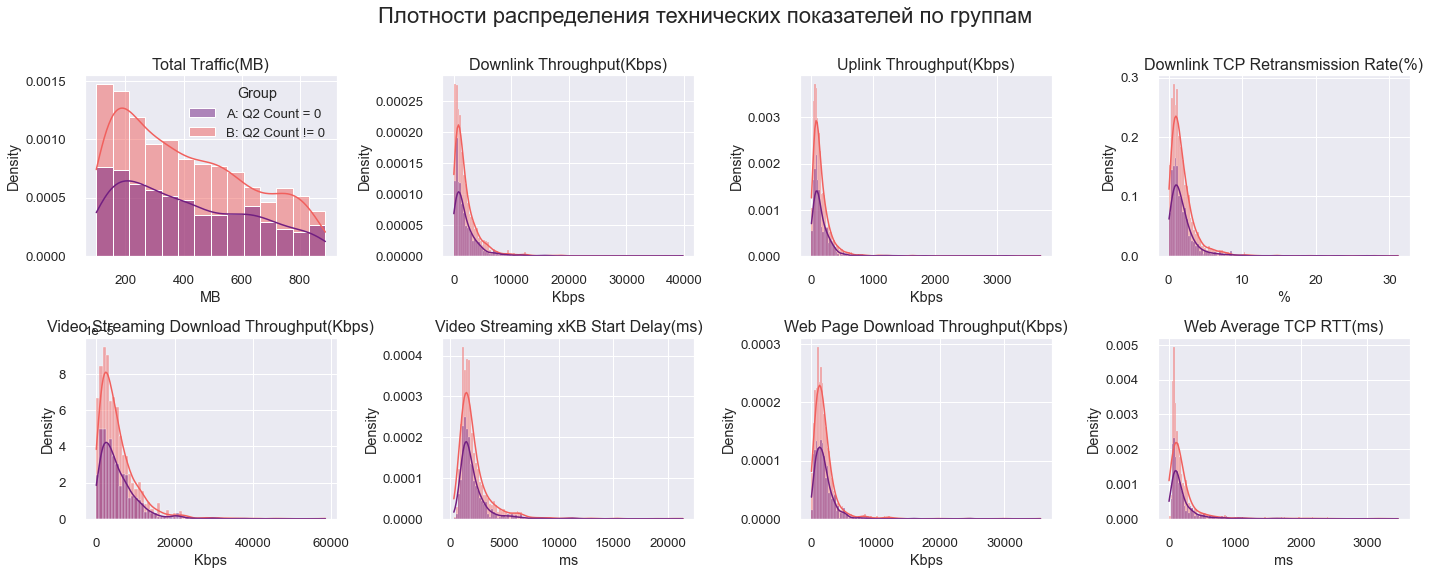

In [51]:
# Визуализация распределения признаков
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
fig.suptitle(
    "Плотности распределения технических показателей по группам", y=1, fontsize=22
)

for ax, feature in zip(axes.ravel(), features):

    sns.histplot(
        data=df_groups,
        x=feature,
        hue="Group",
        stat="density",
        ax=ax,
        alpha=0.5,
        kde=True,
        palette="magma",
    )

    ax.set_title(feature, fontsize=16)
    ax.tick_params(size=12)
    ax.set_xlabel(re.findall(r"\((\S+)\)", feature)[0])
    if ax != axes[0][0]:
        ax.get_legend().remove()

plt.tight_layout()
plt.show()

Распределения обеих групп скошены вправо, есть длинные хвосты — воспользуемся бутстрапом.

### A/B тесты:

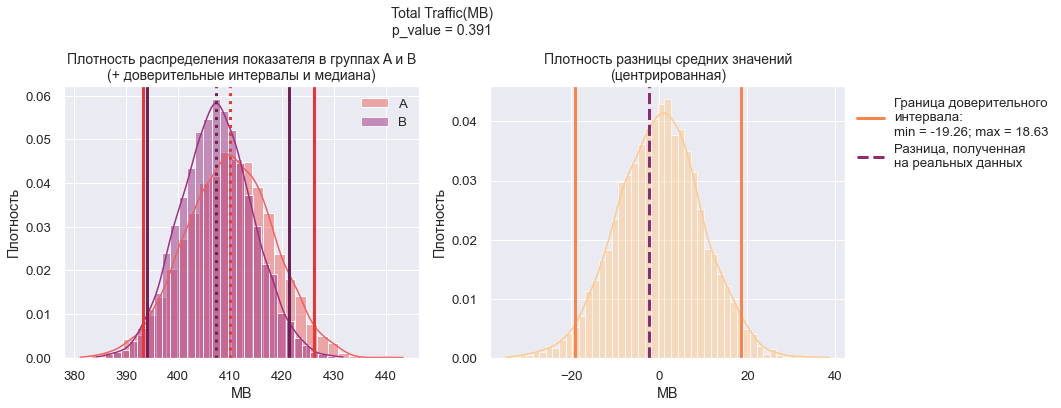

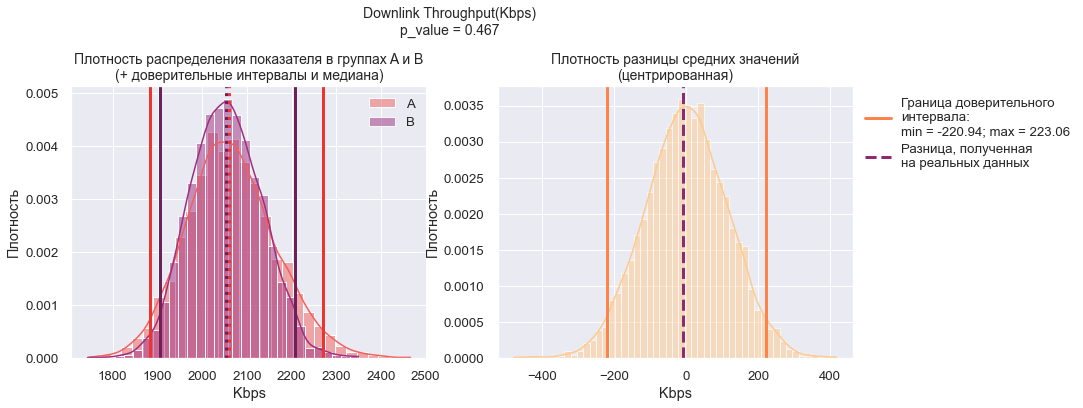

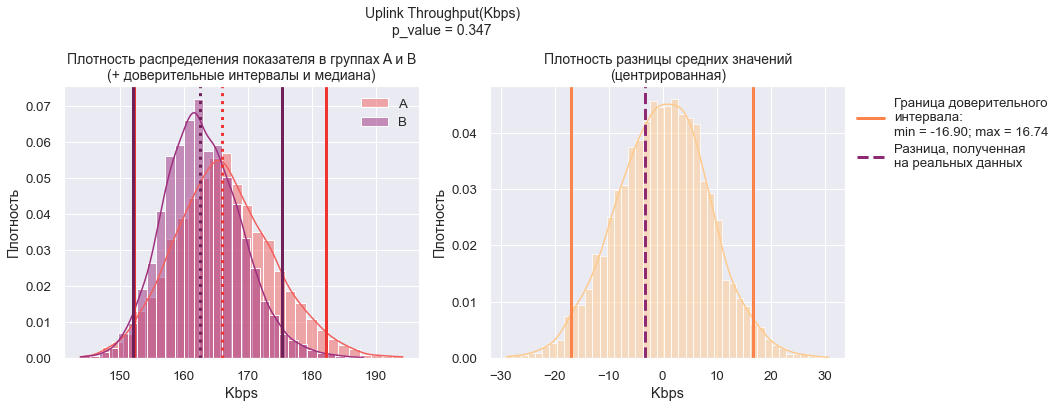

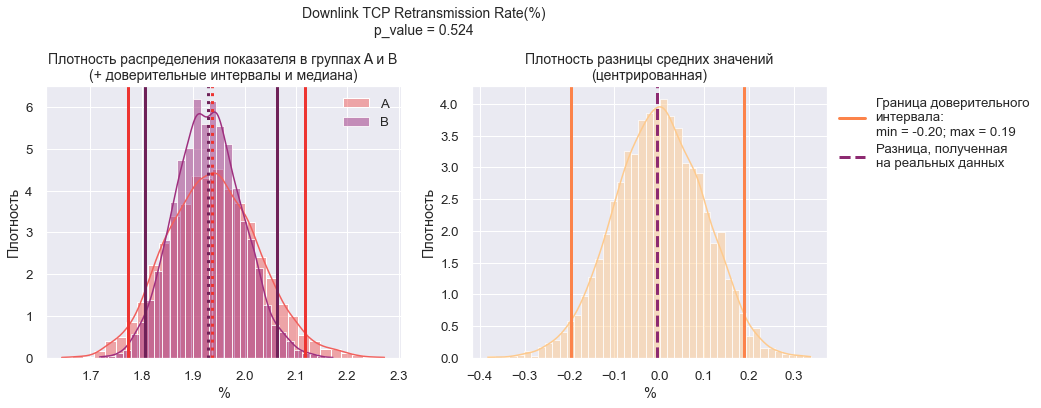

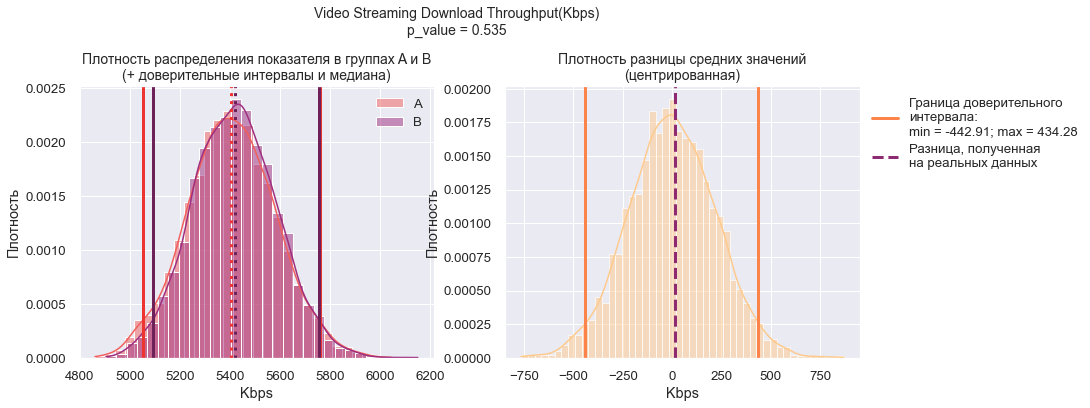

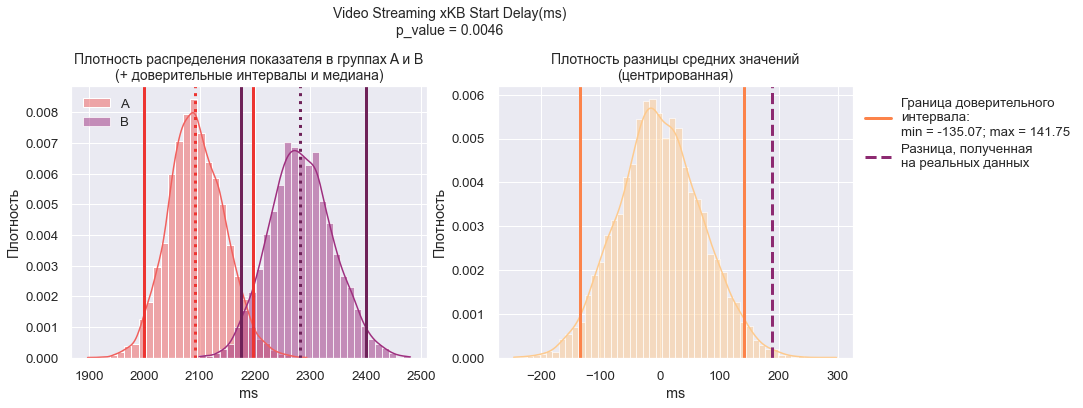

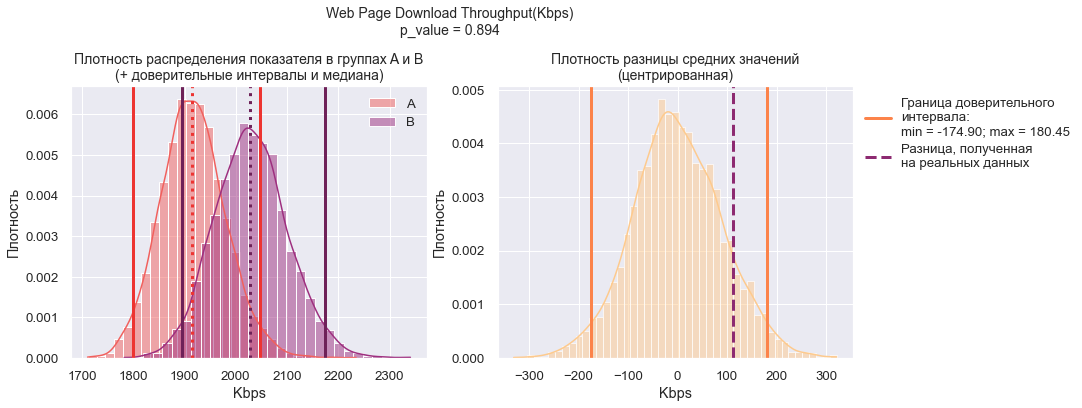

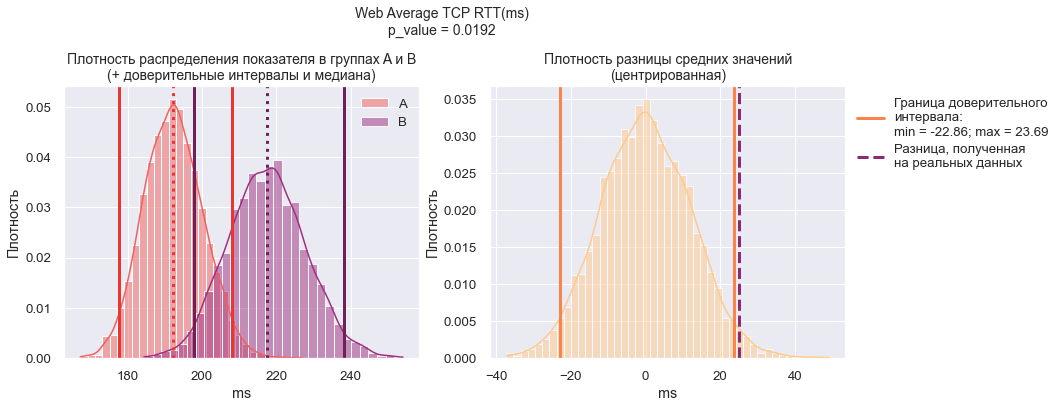

In [52]:
for feature in A.columns[1:]:
    AB_test(A[feature], B[feature], title=feature, func=np.mean)

In [53]:
printmd("**ttest_ind p_value:** \n")

for feature in A.columns[1:]:
    t, p_value_t = ttest_ind(A[feature], B[feature], equal_var=False)
    print(f"{feature}: {p_value_t:.4f}")

**ttest_ind p_value:** 


Total Traffic(MB): 0.8115
Downlink Throughput(Kbps): 0.9395
Uplink Throughput(Kbps): 0.7166
Downlink TCP Retransmission Rate(%): 0.9555
Video Streaming Download Throughput(Kbps): 0.9441
Video Streaming xKB Start Delay(ms): 0.0080
Web Page Download Throughput(Kbps): 0.2040
Web Average TCP RTT(ms): 0.0362


**1. Total Traffic(MB)**  
${H_{0}: TT_{A:\ Q2\ Count\ =\ 0} = TT_{B:\ Q2\ Count\ ≥\ 1}}$.  
*Нулевая гипотеза: Объем трафика передачи данных среди недовольных клиентов, которые не оставили жалоб во 2ом вопросе, и клиентов, которые оставили 1 и более жалоб, не отличается.*   
Доверительные интервалы полностью перекрываются. p_value > 0.05. На имеющихся данных на 5%-ом уровне значимости нет оснований отвергнуть нулевую гипотезу о том, что объем трафика передачи данных в группах не отличается.<br><br>

**2. Downlink Throughput(Kbps)**  
${H_{0}: DT_{A:\ Q2\ Count\ =\ 0} = DT_{B:\ Q2\ Count\ ≥\ 1}}$  
*Нулевая гипотеза: Cредняя скорость «к абоненту» среди недовольных клиентов, которые не оставили жалоб во 2ом вопросе, и клиентов, которые оставили 1 и более жалоб, не отличается.*   
Доверительные интервалы полностью перекрываются. p_value > 0.05. На имеющихся данных на 5%-ом уровне значимости нет оснований отвергнуть нулевую гипотезу о том, что средняя скорость «к абоненту» в группах не отличается.<br><br>

**3. Uplink Throughput(Kbps)**  
${H_{0}: UT_{A:\ Q2\ Count\ =\ 0} = UT_{B:\ Q2\ Count\ ≥\ 1}}$  
*Нулевая гипотеза: Cредняя скорость «от абонента» среди недовольных клиентов, которые не оставили жалоб во 2ом вопросе, и клиентов, которые оставили 1 и более жалоб, не отличается.*   
Доверительные интервалы полностью перекрываются. p_value > 0.05. На имеющихся данных на 5%-ом уровне значимости нет оснований отвергнуть нулевую гипотезу о том, что средняя скорость «от абонента» в группах не отличается.<br><br>

**4. Downlink TCP Retransmission Rate(%)**  
${H_{0}: DTCPRR_{A:\ Q2\ Count\ =\ 0} = DTCPRR_{B:\ Q2\ Count\ ≥\ 1}}$  
*Нулевая гипотеза: Частота переотправок пакетов «к абоненту» среди недовольных клиентов, которые не оставили жалоб во 2ом вопросе, и клиентов, которые оставили 1 и более жалоб, не отличается.*   
Доверительные интервалы полностью перекрываются. p_value > 0.05. На имеющихся данных на 5%-ом уровне значимости нет оснований отвергнуть нулевую гипотезу о том, что частота переотправок пакетов «к абоненту» в группах не отличается.<br><br>

**5. Video Streaming Download Throughput(Kbps)**  
${H_{0}: VSDT_{A:\ Q2\ Count\ =\ 0} = VSDT_{B:\ Q2\ Count\ ≥\ 1}}$  
*Нулевая гипотеза: Скорость загрузки потокового видео среди недовольных клиентов, которые не оставили жалоб во 2ом вопросе, и клиентов, которые оставили 1 и более жалоб, не отличается.*   
Доверительные интервалы полностью перекрываются. p_value > 0.05. На имеющихся данных на 5%-ом уровне значимости нет оснований отвергнуть нулевую гипотезу о том, что скорость загрузки потокового видео в группах не отличается.<br><br>

**6. Video Streaming xKB Start Delay(ms)**  
${H_{0}: VSSD_{A:\ Q2\ Count\ =\ 0} = VSSD_{B:\ Q2\ Count\ ≥\ 1}}$  
*Нулевая гипотеза: Задержка старта воспроизведения видео среди недовольных клиентов, которые не оставили жалоб во 2ом вопросе, и клиентов, которые оставили 1 и более жалоб, не отличается.*   
Доверительные интервалы пересекаются. p_value < 0.05. На имеющихся данных на 5%-ом уровне значимости есть основания отвергнуть нулевую гипотезу о том, что задержка старта воспроизведения видео в группах не отличается.<br><br>

**7. Web Page Download Throughput(Kbps)**  
${H_{0}: WPDT_{A:\ Q2\ Count\ =\ 0} = WPDT_{B:\ Q2\ Count\ ≥\ 1}}$  
*Нулевая гипотеза: Скорость загрузки web-страниц через браузер среди недовольных клиентов, которые не оставили жалоб во 2ом вопросе, и клиентов, которые оставили 1 и более жалоб, не отличается.*   
Доверительные интервалы пересекаются. p_value > 0.05. На имеющихся данных на 5%-ом уровне значимости нет оснований отвергнуть нулевую гипотезу о том, что скорость загрузки web-страниц через браузер в группах не отличается.<br><br>

**8. Web Average TCP RTT(ms)**  
${H_{0}: WATCPRTT_{A:\ Q2\ Count\ =\ 0} = WATCPRTT_{B:\ Q2\ Count\ ≥\ 1}}$  
*Нулевая гипотеза: Пинг при просмотре web-страниц среди недовольных клиентов, которые не оставили жалоб во 2ом вопросе, и клиентов, которые оставили 1 и более жалоб, не отличается.*   
Доверительные интервалы пересекаются. p_value < 0.05. На имеющихся данных на 5%-ом уровне значимости есть основания отвергнуть нулевую гипотезу о том, что пинг при просмотре web-страниц в группах не отличается.<br><br>

### Выводы: 
**2 из 8 метрик качества телекоммуникационных услуг (Video Streaming xKB Start Delay(ms) и Web Average TCP RTT(ms)) имеют статистические значимые различия между группами. Таким образом можно предположить, что длительное время загрузки интернет-страниц и видеоконтента являются одними из ключевых причин неудовлетворенности клиентов. Тем не менее, есть вероятность, что некоторая часть респондентов не высказала никаких жалоб во втором вопросе по причине отсутствия удобного интерфейса опроса. Получение более подробных жалоб и рекомендаций пользователей потенциально может привести к получению более точных результатов, поэтому стоит поработать над созданием интерфейса и улучшением дизайна опроса.**

# Общие выводы: 
* __Для удержания пользователей, повышения удовлетворённости клиентов качеством услуг и их оценок в дальнейшем компании "Мегафон" необходимо улучшать качество связи и мобильного интернета: технические показатели метрик `Downlink Throughput(Kbps), Uplink Throughput(Kbps), Video Streaming Download Throughput(Kbps), Web Page Download Throughput(Kbps)` *в сторону увеличения* их параметров, а также `Downlink TCP Retransmission Rate(%), Video Streaming xKB Start Delay(ms), Web Average TCP RTT(ms)` *в сторону уменьшения*.__
* __Было установлено, что показатели `Video Streaming xKB Start Delay(ms) и Web Average TCP RTT(ms)` *влияют на неудовлетворенность клиентов больше остальных* по результатам 2ого вопроса, то есть "Мегафон" должен вкладывать больше времени и усилий в улучшение этих характеристик.__ 
* __Кроме того, была замечена взаимосвязь показателей `Video Streaming xKB Start Delay(ms), Web Average TCP RTT(ms), Video Streaming Download Throughput(Kbps) и Web Page Download Throughput(Kbps)`: если попытаться улучшить выше представленные параметра, скорее всего это *повлечет за собой изменение и других показателей*.__ 
* __В дальнейшем нужно проводить опрос в приложении с помощью специального интерфейса, что поможет *избежать большого количества некорректных или трудно интерпретируемых ответов*, а так же *побудит клиентов больше участвовать* в опросе, что впоследствии приведет к более точным результатам.__